# Práctica Data mining, alumno José Carlos Amo Pérez 

Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [57]:
#Cargo librerías antes de nada:
install.packages("dplyr")
library(dplyr)
library(dendextend)
library(cluster)
library(GGally)

#Borro todos los df para evitar arrastrar cosas incorrectas:
#rm("df_madridFinal")

#print(paste("Tengo estos dfs:",ls())) #verifico que no tengo dataframes en el espacio de trabajo


#Ahora sí:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
head(airbnb, n=2)  # Esto es solo como comprobacion de la carga de datos

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,⋯,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,14712301,https://www.airbnb.com/rooms/14712301,2.01703e+13,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",none,,⋯,9,9,10,,,strict,1,0.34,"51.492474020220754,-0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
2,12884849,https://www.airbnb.com/rooms/12884849,2.01703e+13,2017-03-05,Five bedroom house in Barnes,"Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children.","The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional and spacious bedrooms as well as shared bathroom. All bedrooms including the children's bedrooms have plenty of wardrobe space. House is basic but clean and fully functional.","Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children. The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional",none,Quiet residential street,⋯,10,10,9,,,moderate,2,0.76,"51.482004616612734,-0.23927746504041247","Host Has Profile Pic,Is Location Exact"


Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [58]:

airbnb2 <- airbnb[ , c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(airbnb2, n=30) # Esto es solo como comprobacion de que ha filtrado bien la
#Ojo! A primiera vista observo NAs en al menos Bathrooms, Beds, Square.Feet y en Review.Scores.Rating
#Ojo! A primiera vista observo "" en Neighbourhood

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
2,London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
3,London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
4,Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
5,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
6,Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612
7,Madrid,Entire home/apt,Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.7112487
8,Madrid,Entire home/apt,Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.7178428
9,Madrid,Private room,Palacio,2,2.0,1,1,30,NA,1,5,67,40.41683,-3.7102398


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [59]:
df_madrid <- subset(airbnb2, City=="Madrid" & Room.Type=="Entire home/apt" & Neighbourhood != "")
head(df_madrid, n=8) #Solo como comprobacion del filtrado
df_madrid <- df_madrid[ , !(names(df_madrid) %in% c("Room.Type","City"))]
head(df_madrid, n=2) #Solo como comprobacion del borrado de columnas

colSums(sapply(df_madrid, is.na)) > 0

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
5,Madrid,Entire home/apt,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Madrid,Entire home/apt,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Madrid,Entire home/apt,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
12,Madrid,Entire home/apt,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Madrid,Entire home/apt,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Madrid,Entire home/apt,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099
16,Madrid,Entire home/apt,La Latina,2,1,0,1,45,NA,1,0,87,40.40812,-3.710367
20,Madrid,Entire home/apt,Embajadores,6,1,2,3,120,NA,6,30,100,40.41314,-3.705092


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249


Neighbourhood         Accommodates            Bathrooms 
               FALSE                FALSE                 TRUE 
            Bedrooms                 Beds                Price 
                TRUE                 TRUE                 TRUE 
         Square.Feet      Guests.Included         Extra.People 
                TRUE                FALSE                FALSE 
Review.Scores.Rating             Latitude            Longitude 
                TRUE                FALSE                FALSE

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [60]:
df_madrid$Square.Meters <- round((df_madrid$Square.Feet * 0.092903),2)
df_madrid <- df_madrid %>% select (-Square.Feet)  #Elimino la columna Square.Feet
head(df_madrid, n=2)   #Mera comprobacion

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,NA
7,Malasaña,4,1,1,2,112,2,5,99,40.42319,-3.711249,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [61]:
percentNA_SM <- sum(is.na(df_madrid$Square.Meters)) / length(df_madrid$Square.Meters)*100
percentNA_SM <- round(percentNA_SM, 4)
print(paste("El porcentaje de apartamentos que no muestran los metros cuadrados es: ", percentNA_SM))


[1] "El porcentaje de apartamentos que no muestran los metros cuadrados es:  93.8047"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [62]:
percentCeros <- sum(df_madrid$Square.Meters == 0, na.rm = TRUE) / (length(df_madrid$Square.Meters) - sum(is.na(df_madrid$Square.Meters)))*100
percentCeros <- round(percentCeros, 4)
print(paste("El porcentaje de apartamentos con 0 metros cuadrados respecto de los !=NA es: ", percentCeros))

[1] "El porcentaje de apartamentos con 0 metros cuadrados respecto de los !=NA es:  36.8876"


Reemplazar todos los 0m^2 por NA 

In [63]:
df_madrid$Square.Meters[grepl(0,df_madrid$Square.Meters)]<-NA
#head(df_madrid, n=8)   #Mera comprobacion
percentNA_SM <- sum(is.na(df_madrid$Square.Meters)) / length(df_madrid$Square.Meters)*100
percentNA_SM <- round(percentNA_SM, 4)
print(paste("Una vez reemplazados todos los 0m^2 por NA, el porcentaje de apartamentos que no muestran los metros cuadrados es: ", percentNA_SM))


[1] "Una vez reemplazados todos los 0m^2 por NA, el porcentaje de apartamentos que no muestran los metros cuadrados es:  97.679"


Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

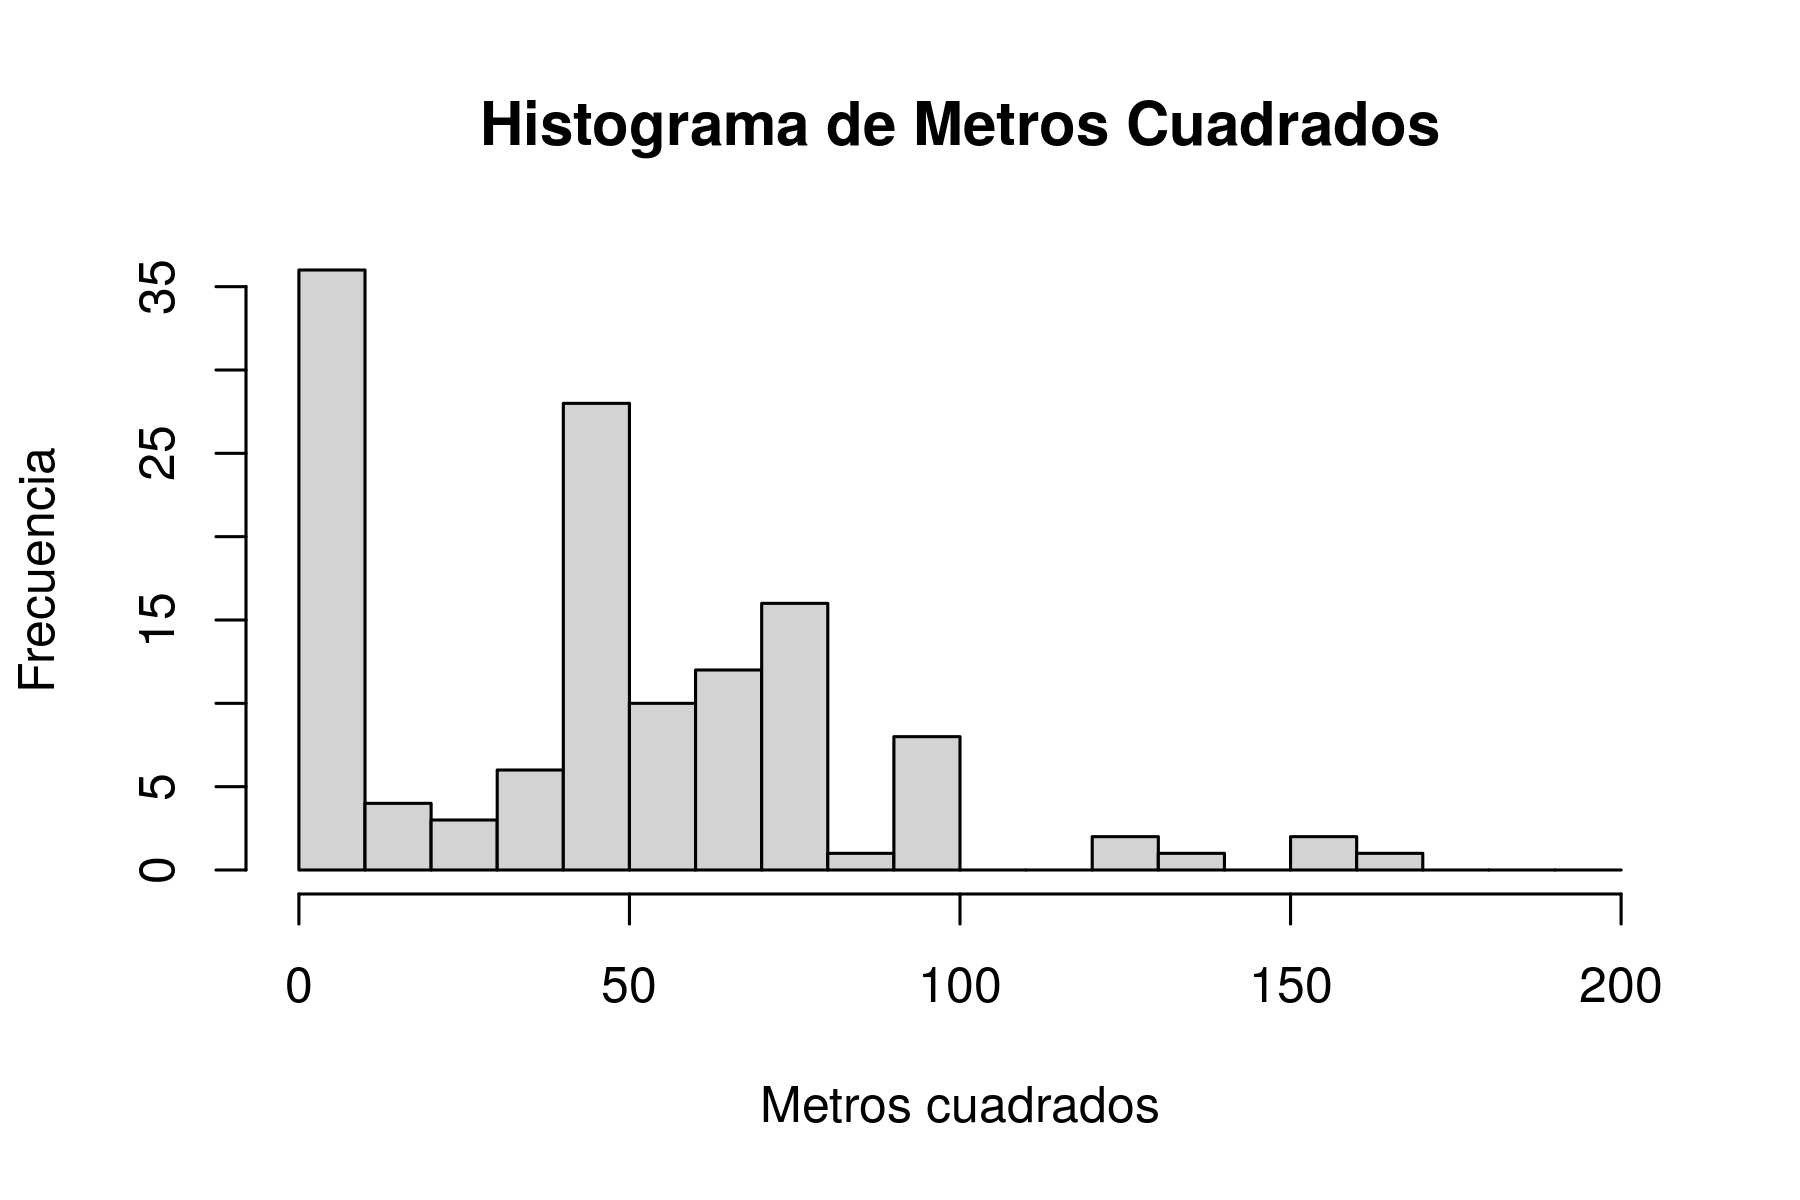

In [64]:
hist(x= df_madrid$Square.Meters, breaks = seq(0, 200, 10), main = "Histograma de Metros Cuadrados", 
     xlab = "Metros cuadrados", ylab = "Frecuencia", xlim=c(0,200))

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [165]:
df_madrid$Square.Meters[df_madrid$Square.Meters <20] <- NA

percentMenosVeinte <- sum(is.na(df_madrid$Square.Meters)) / length(df_madrid$Square.Meters)*100
percentMenosVeinte <- round(percentMenosVeinte, 4)
print(paste("Una vez reemplazados por NA todos los apartamentos de menos de 20m^2, el porcentaje de apartamentos que no muestran los metros cuadrados es: ", percentMenosVeinte))

#########################################################################################
#########################################################################################
df_ParaPCA <- df_madrid    #Este es el df que usaré en la ultima pregunta relativa al PCA
#########################################################################################
#########################################################################################

[1] "Una vez reemplazados por NA todos los apartamentos de menos de 20m^2, el porcentaje de apartamentos que no muestran los metros cuadrados es:  98.3931"


Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [11]:

TienenNA_unicos <- unique(subset(df_madrid, is.na(df_madrid$Square.Meters), select = "Neighbourhood")) #subset de valores unicos por barrios y con Square.Meters = NA
VectorSINNA <- TienenNA_unicos$Neighbourhood        #paso el subset a vector para poder usar la funcion setdiff luego

NoTienenNA_unicos <- unique(subset(df_madrid, !is.na(df_madrid$Square.Meters), select = "Neighbourhood")) #subset de valores unicos por barrios y con Square.Meters != NA
VectorCONNA <- NoTienenNA_unicos$Neighbourhood     #paso el subset a vector

BarriosTodoNA <- setdiff(VectorSINNA, VectorCONNA) #con setdiff filtro los barrios con solo valores NA
BarriosTodoNA   #mera verificacion


#df.mensual <- df.mensual %>% filter(!codigo %in% vector)
df_madrid <- df_madrid %>% filter (!Neighbourhood %in% BarriosTodoNA)


[1] "Hortaleza"           "Villaverde"          "La Chopera"         
 [4] "Legazpi"             "Palos do Moguer"     "Prosperidad"        
 [7] "Hispanoamérica"      "Nueva España"        "Castilla"           
[10] "Bellas Vistas"       "Cuatro Caminos"      "Valdeacederas"      
[13] "Guindalera"          "Castellana"          "El Viso"            
[16] "Recoletos"           "Goya"                "Pacifico"           
[19] "Ibiza"               "Jerónimos"           "Rios Rosas"         
[22] "Aluche"              "Puente de Vallecas"  "Vicálvaro"          
[25] "Estrella"            "Gaztambide"          "Chamberí"           
[28] "Imperial"            "Atocha"              "Delicias"           
[31] "Ciudad Jardin"       "Fuencarral-el Pardo" "Castillejos"        
[34] "Vallehermosa"        "Berruguete"          "Villa de Vallecas"  
[37] "Tetuán"              "Moncloa"             "Fuencarral-El Pardo"
[40] "Arganzuela"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

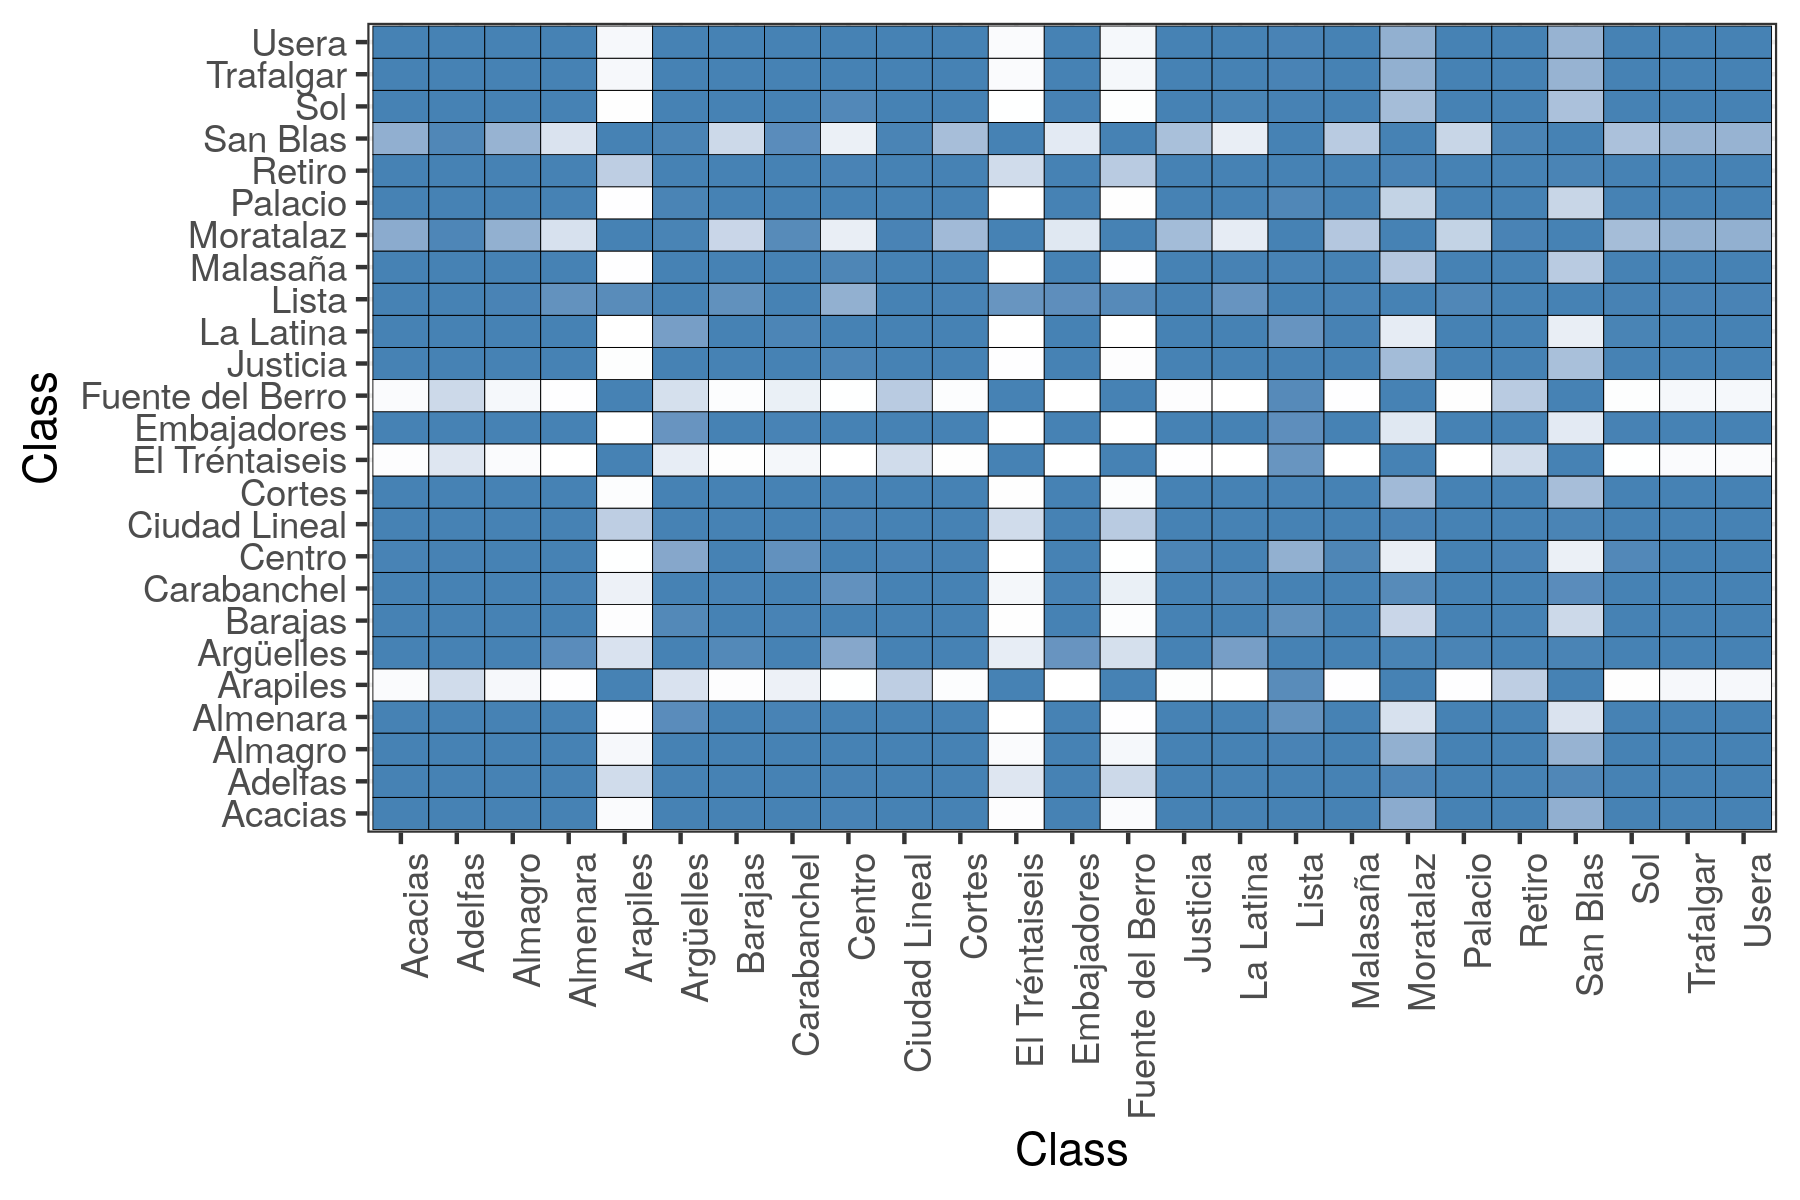

In [12]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))     
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))                                    
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


**A continuación voy a pedir que cree un numero alto de clusters (digamos 6 por ejemplo) para ver el aspecto del dendrograma. Y en función del aspecto ya elegir el número adecuado y en el siguiente scipt hacer dendrograma y silhouette ya con el numero de clusters elegido**

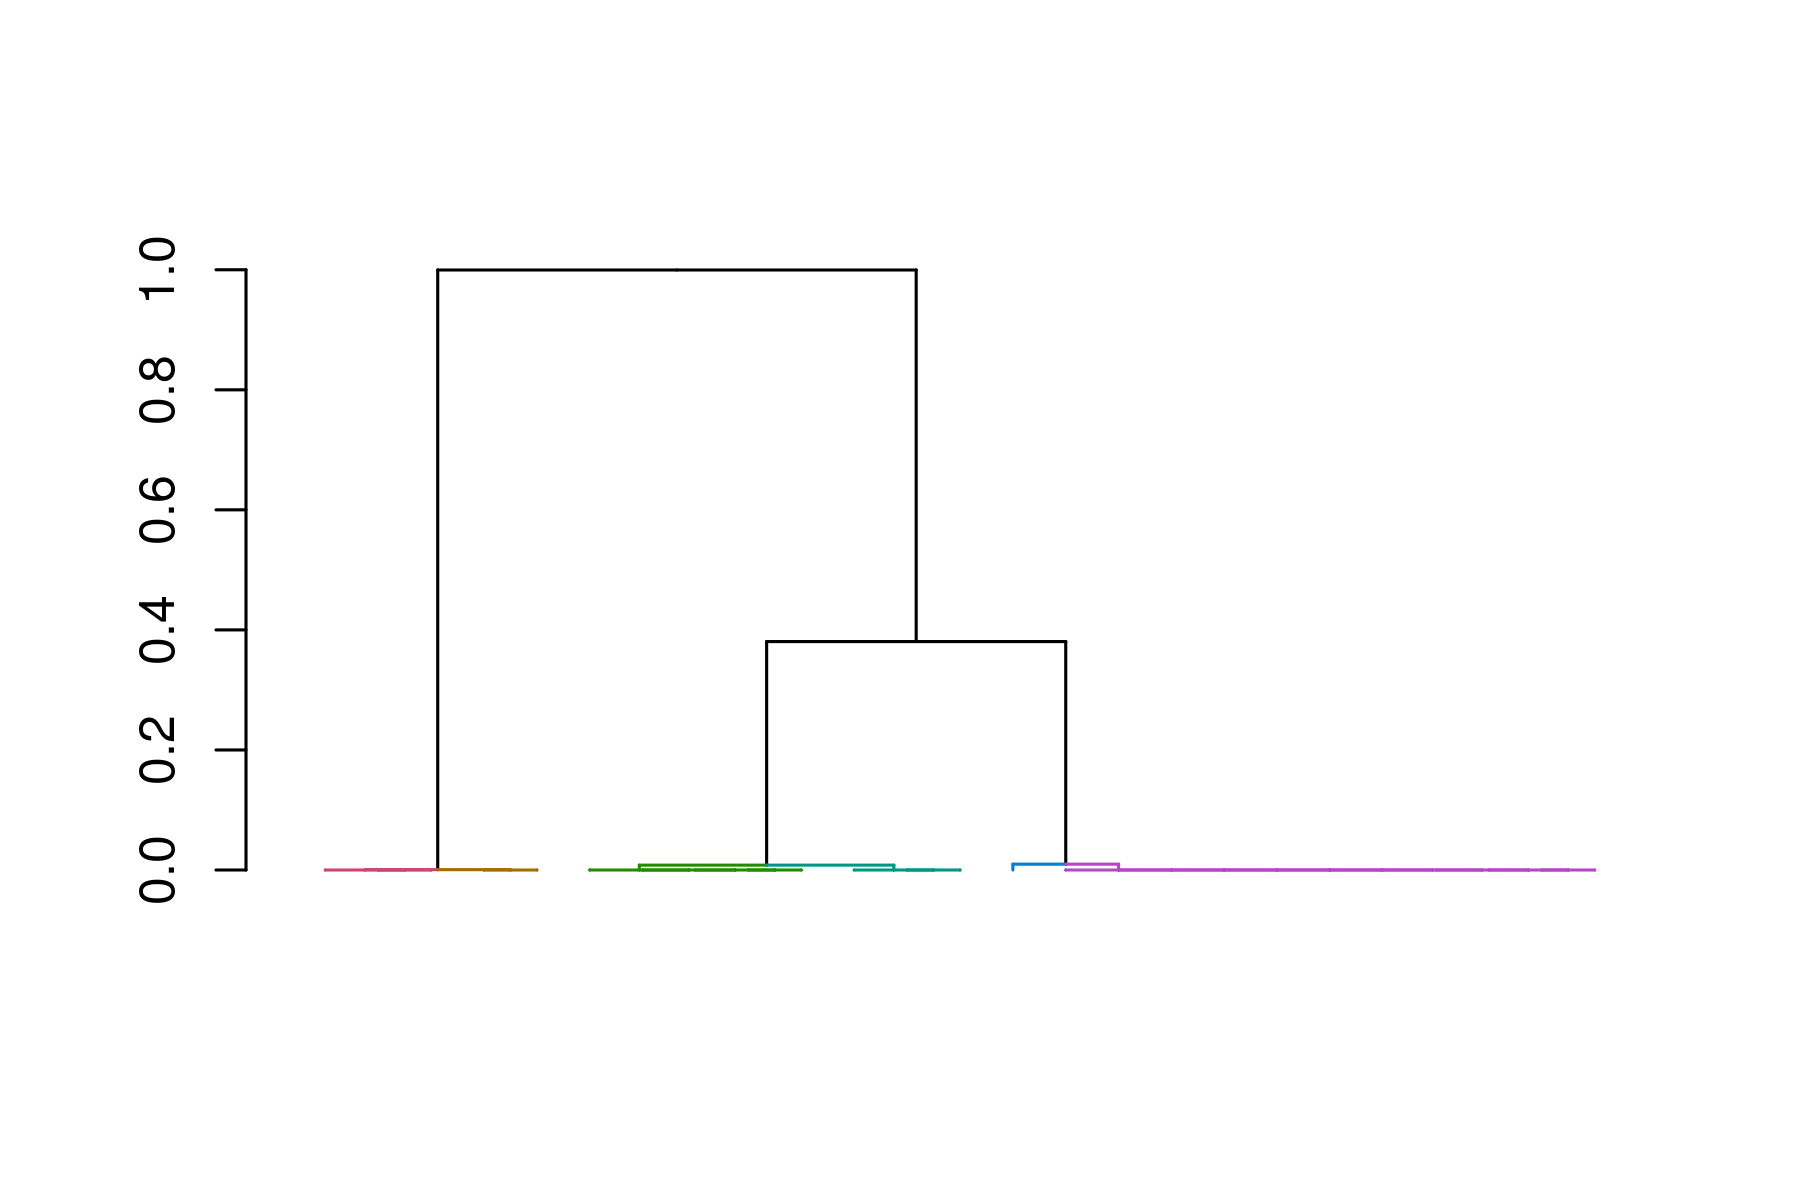

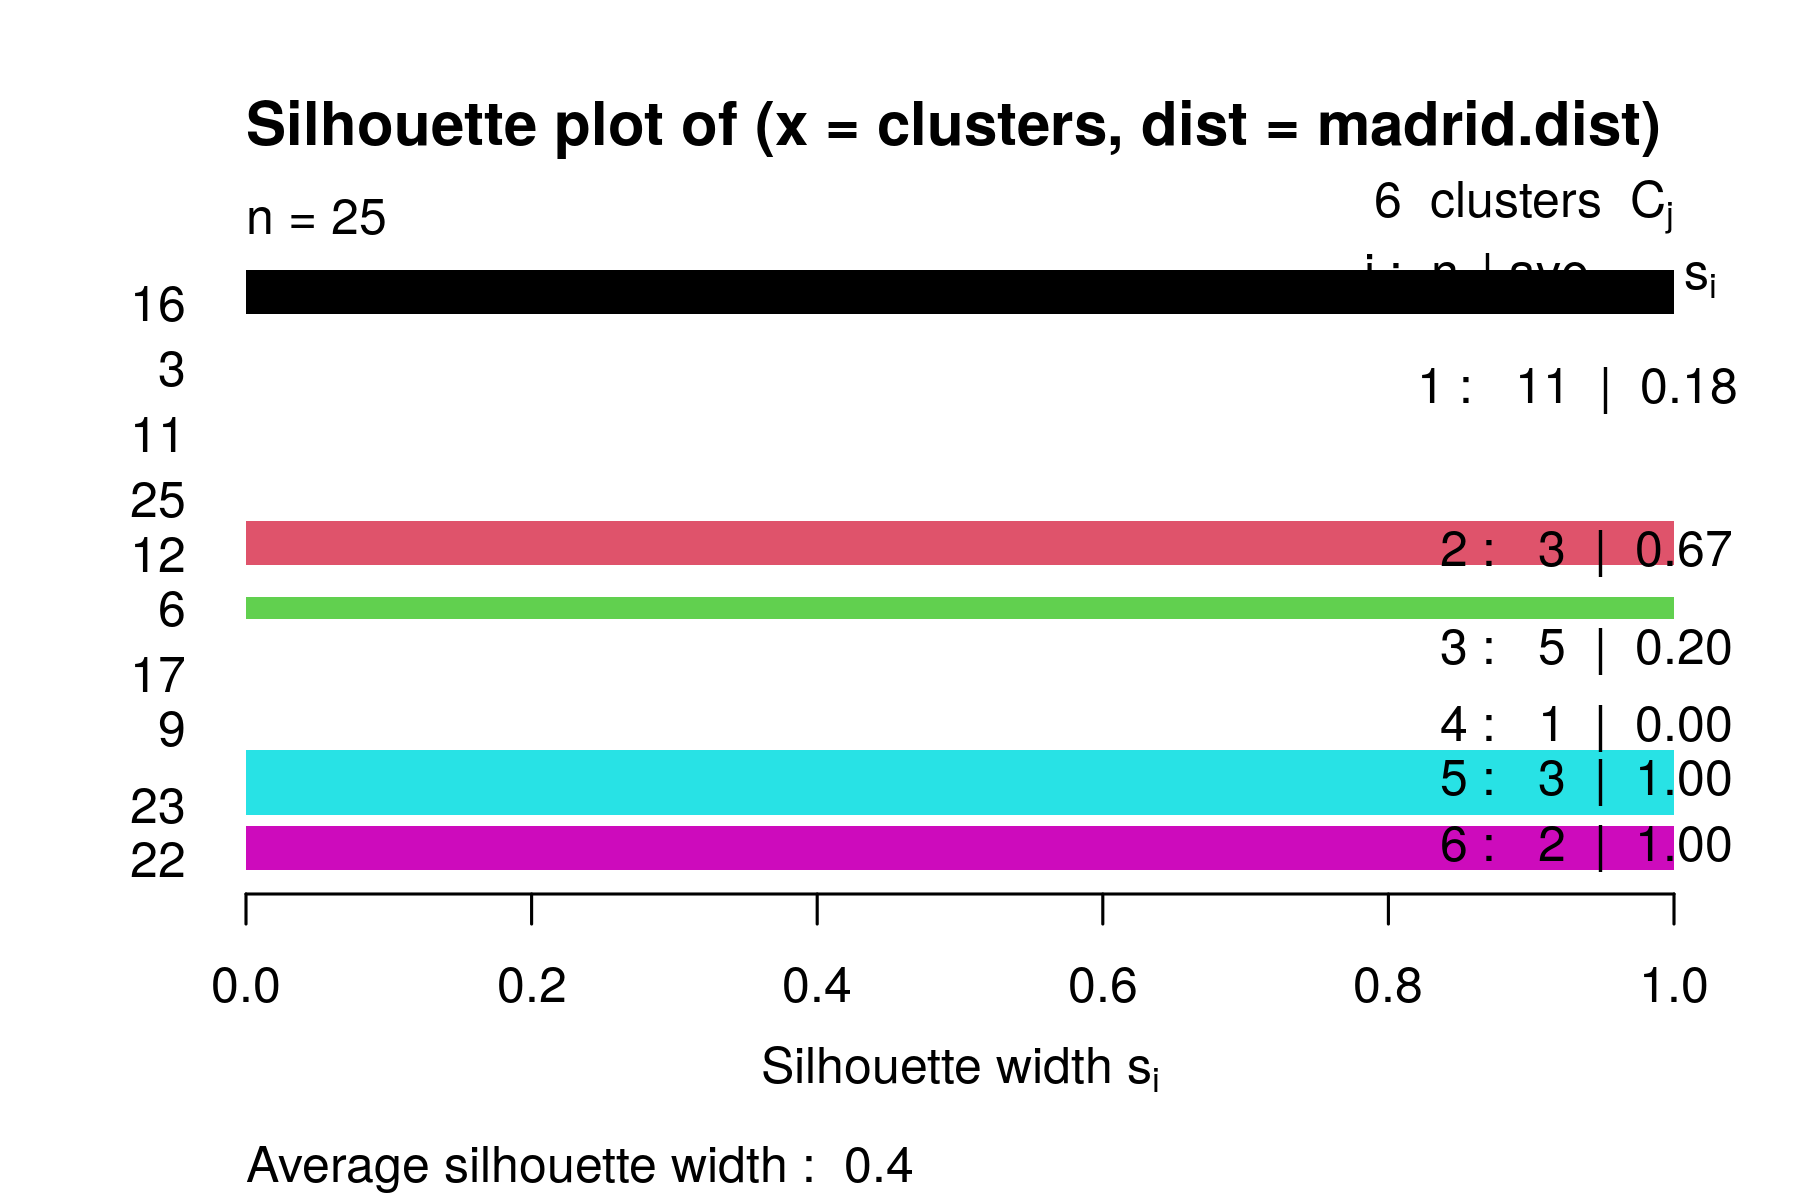

In [13]:
#Calculo la matriz de distancias a partir del resm del Tukey
madrid.dist<- as.dist(1 - abs(resm))
#str(madrid2.dist)
#madrid2.dist     #solo para comprobar que sale triangular

#Calculo dendrograma:
madrid.tree <- hclust(madrid.dist, method="complete")
madrid.dend <- as.dendrogram(madrid.tree)

#Lo dibujo:

################
NClusters <- 6  ##### Ajustar NClusters para cambiar el numero de clusters        
################
clusters <- cutree(madrid.dend, k <- NClusters)
plot(color_branches(madrid.dend, k <- NClusters),leaflab="none")

#Y dibujo silhouette:
ss<-silhouette(clusters, madrid.dist)
plot(ss,col=1:max(clusters),border=NA)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

**A la vista del anterior dendrograma decido quedaarme con con 3 clusters para hacer dendrograma y silhouette "definitivos", o lo que es lo mismo con altura de corte en 0.2, que es lo que viene a continuación:**

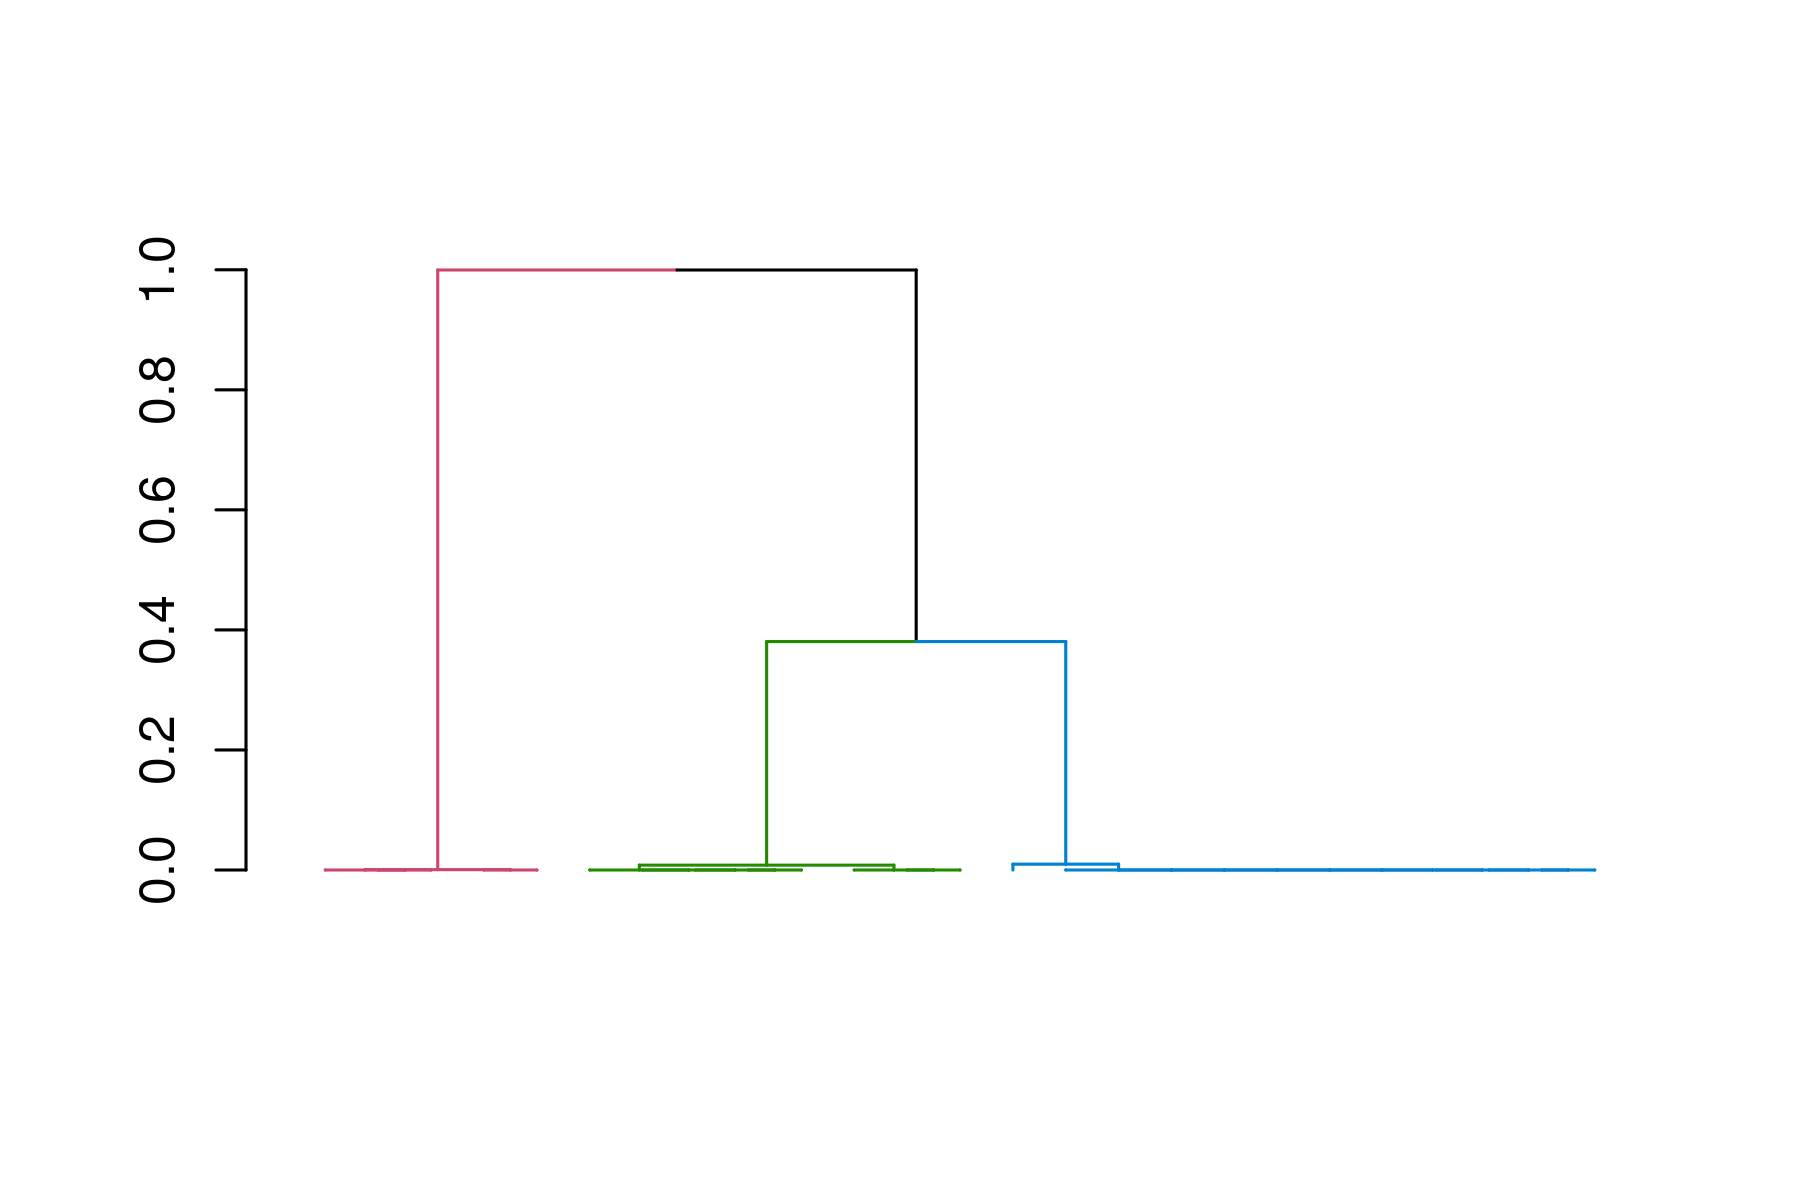

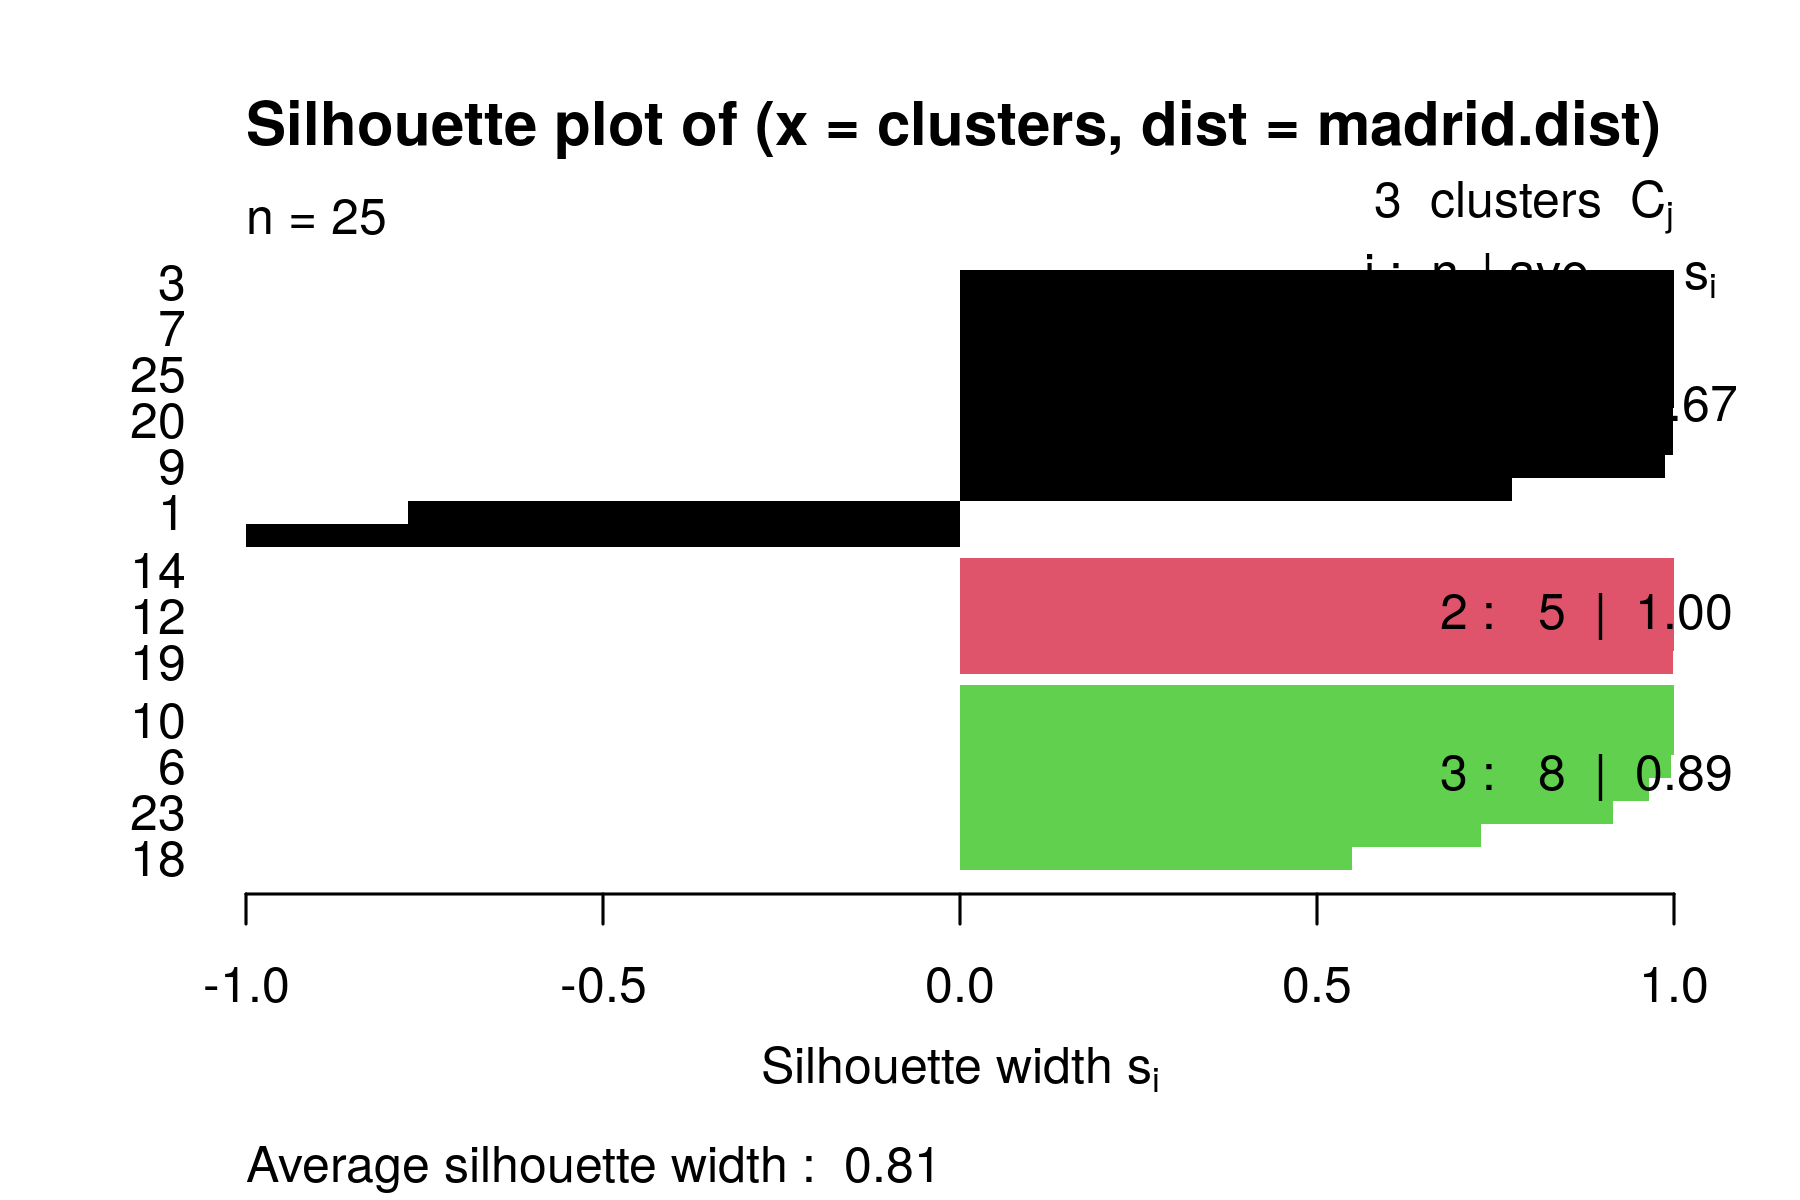

In [14]:
#Calculo la matriz de distancias a partir del resm del Tukey
madrid.dist<- as.dist(1 - abs(resm))
#str(madrid2.dist)
#madrid2.dist     #solo para comprobar que sale triangular

#Calculo dendrograma:
madrid.tree <- hclust(madrid.dist, method="complete")
madrid.dend <- as.dendrogram(madrid.tree)

#Lo dibujo:

################
HClusters <- 0.2  ##### Ajustar HClusters para cambiar la altura donde se debe cortar el árbol       
################
clusters <- cutree(madrid.dend, h = HClusters)
plot(color_branches(madrid.dend, h = HClusters),leaflab="none")

#Y dibujjo silhouette:
ss<-silhouette(clusters, madrid.dist)
plot(ss,col=1:max(clusters),border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [15]:

# Muestro por pantalla qué barrios están en cada cluster:
NClusters <- 3
for (i in 1:NClusters) {
    cat("El cluster", i, "lo forman:", paste(names(clusters[clusters==i]), collapse=", "), "\n")
}

#A partir del dataframe df_madrid2 creo un nuevo df llamado df_madrid3 con la nueva columna neighb_id que indica la clave 
# del cluster al que pertence el barrio:
c1 <- names(clusters[clusters==1])
c2 <- names(clusters[clusters==2])
c3 <- names(clusters[clusters==3])

df_madrid <- df_madrid %>% mutate(neighb_id = case_when(Neighbourhood %in% c1 ~ 1,
                                Neighbourhood %in% c2 ~ 2,
                                Neighbourhood %in% c3 ~ 3,
                                TRUE ~ 0))

head(df_madrid, n=4)

El cluster 1 lo forman: Acacias, Adelfas, Almagro, Almenara, Barajas, Centro, Cortes, Embajadores, La Latina, Palacio, Trafalgar, Usera 
El cluster 2 lo forman: Arapiles, El Tréntaiseis, Fuente del Berro, Moratalaz, San Blas 
El cluster 3 lo forman: Argüelles, Carabanchel, Ciudad Lineal, Justicia, Lista, Malasaña, Retiro, Sol 


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,NA,1
2,Malasaña,4,1,1,2,112,2,5,99,40.42319,-3.711249,NA,3
3,Palacio,8,3,3,4,190,6,40,96,40.41651,-3.717843,NA,1
4,La Latina,2,1,1,1,71,1,0,90,40.41200,-3.706691,NA,1


In [16]:
# Voy a reducir las variables del df eliminando Square.Feet, Latitude y Longitude porque no van a aportar al modelo y Neighbourhood porque ya lo tengo representado mediante los clusters:
df_madrid <- df_madrid[ , !(names(df_madrid) %in% c("Square.Feet", "Latitude", "Longitude", "Neighbourhood"))]

#Y reordeno la posicion de las columnas porque quiero tener Square.Meters la primera y neighb_id la segunda (momento TOC ;))
df_madrid <- df_madrid %>% select (Square.Meters, neighb_id, Accommodates, Bathrooms, Bedrooms, Beds, Price, Guests.Included, Extra.People, Review.Scores.Rating)

# Voy a ver qué columnas tienen NAs 
apply(X = is.na(df_madrid), MARGIN = 2, FUN = sum)

# Voy a ver el % de NAs en cada columna
apply(is.na(df_madrid), 2, mean)


head(df_madrid)   #Mera verificacion


Square.Meters            neighb_id         Accommodates 
                4233                    0                    0 
           Bathrooms             Bedrooms                 Beds 
                  14                    7                    8 
               Price      Guests.Included         Extra.People 
                   4                    0                    0 
Review.Scores.Rating 
                 578

Square.Meters            neighb_id         Accommodates 
        0.9791811242         0.0000000000         0.0000000000 
           Bathrooms             Bedrooms                 Beds 
        0.0032384918         0.0016192459         0.0018505667 
               Price      Guests.Included         Extra.People 
        0.0009252834         0.0000000000         0.0000000000 
Review.Scores.Rating 
        0.1337034467

,Square.Meters,neighb_id,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,NA,1,2,1,1,1,85,1,0,95
2,NA,3,4,1,1,2,112,2,5,99
3,NA,1,8,3,3,4,190,6,40,96
4,NA,1,2,1,1,1,71,1,0,90
5,NA,1,2,NA,1,NA,34,1,6,88
6,NA,1,3,1,0,2,60,1,0,100


**Vemos que el 97.9 de las observaciones tienen NA en Square.Meters y que el 13.4 tienen NA en Review.Scores.Rating por lo que voy a crear un df que no tenga datos faltantes para poder crear y entrenar el modelo**


In [17]:
df_madrid <- na.omit(df_madrid)
head(df_madrid, n=10)   #Mera verificacion

,Square.Meters,neighb_id,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
106,69.96,3,5,1.0,2,5,100,2,5,91
177,99.96,3,6,1.0,3,4,85,2,0,88
233,49.98,3,5,1.0,1,1,75,1,0,90
249,38.00,1,4,1.0,2,3,85,3,10,94
276,24.99,3,2,1.0,1,1,65,2,0,93
288,69.96,3,4,1.0,1,1,100,2,10,87
356,49.98,3,4,1.0,0,2,54,2,10,87
370,55.00,1,4,1.0,1,1,48,1,10,91
523,44.97,3,3,1.0,0,1,53,1,10,90


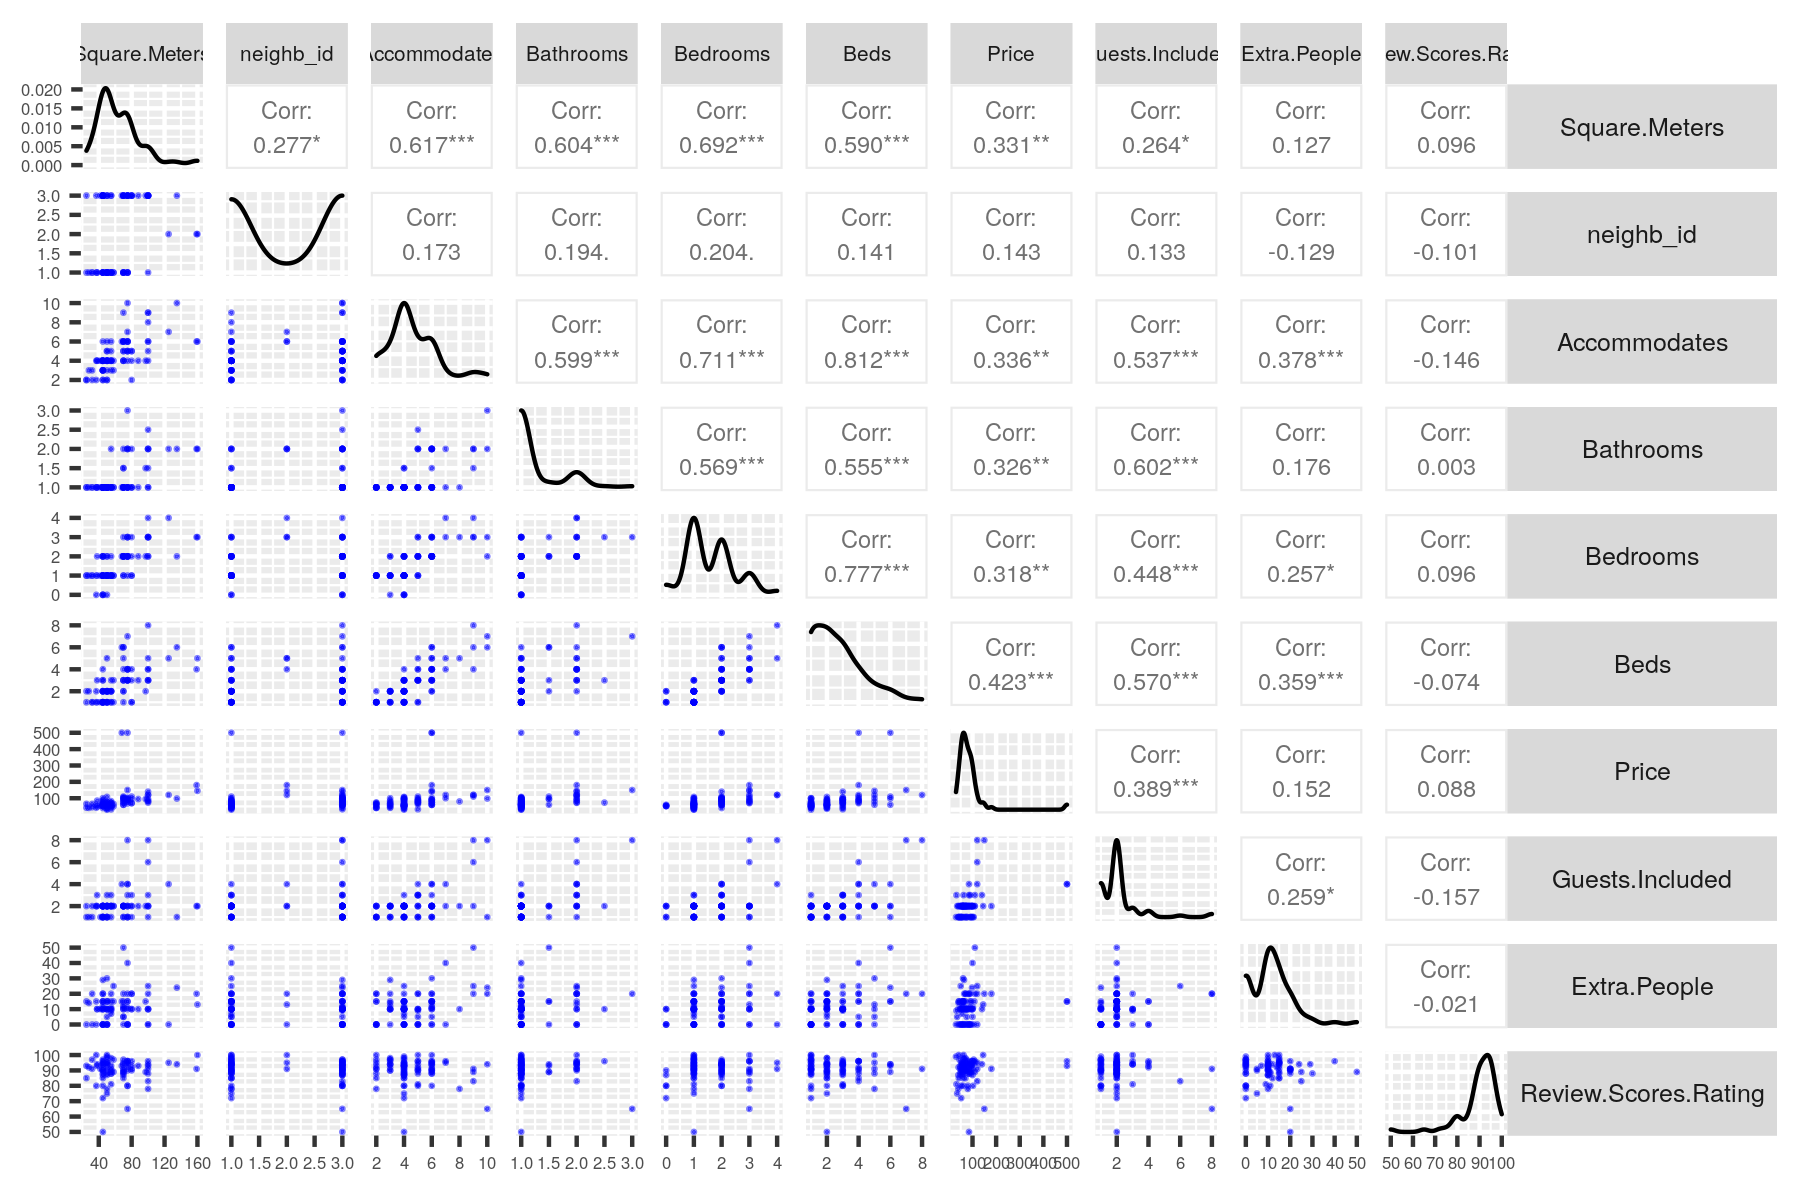

In [18]:

DiagramaDispersion <- ggpairs(df_madrid,
        upper = list(continuous = wrap("cor", size = 2)),
        lower = list(continuous = wrap("points", alpha = 0.5,size=0.1,color='blue')))

DiagramaDispersion + theme(strip.text.x = element_text(angle = 0, size = 5),
                           strip.text.y = element_text(angle = 0, size = 6),
                           axis.text = element_text(size = 4))



**Voy a ver los histogrmas (excepto el de clusters que no tiene sentido)**

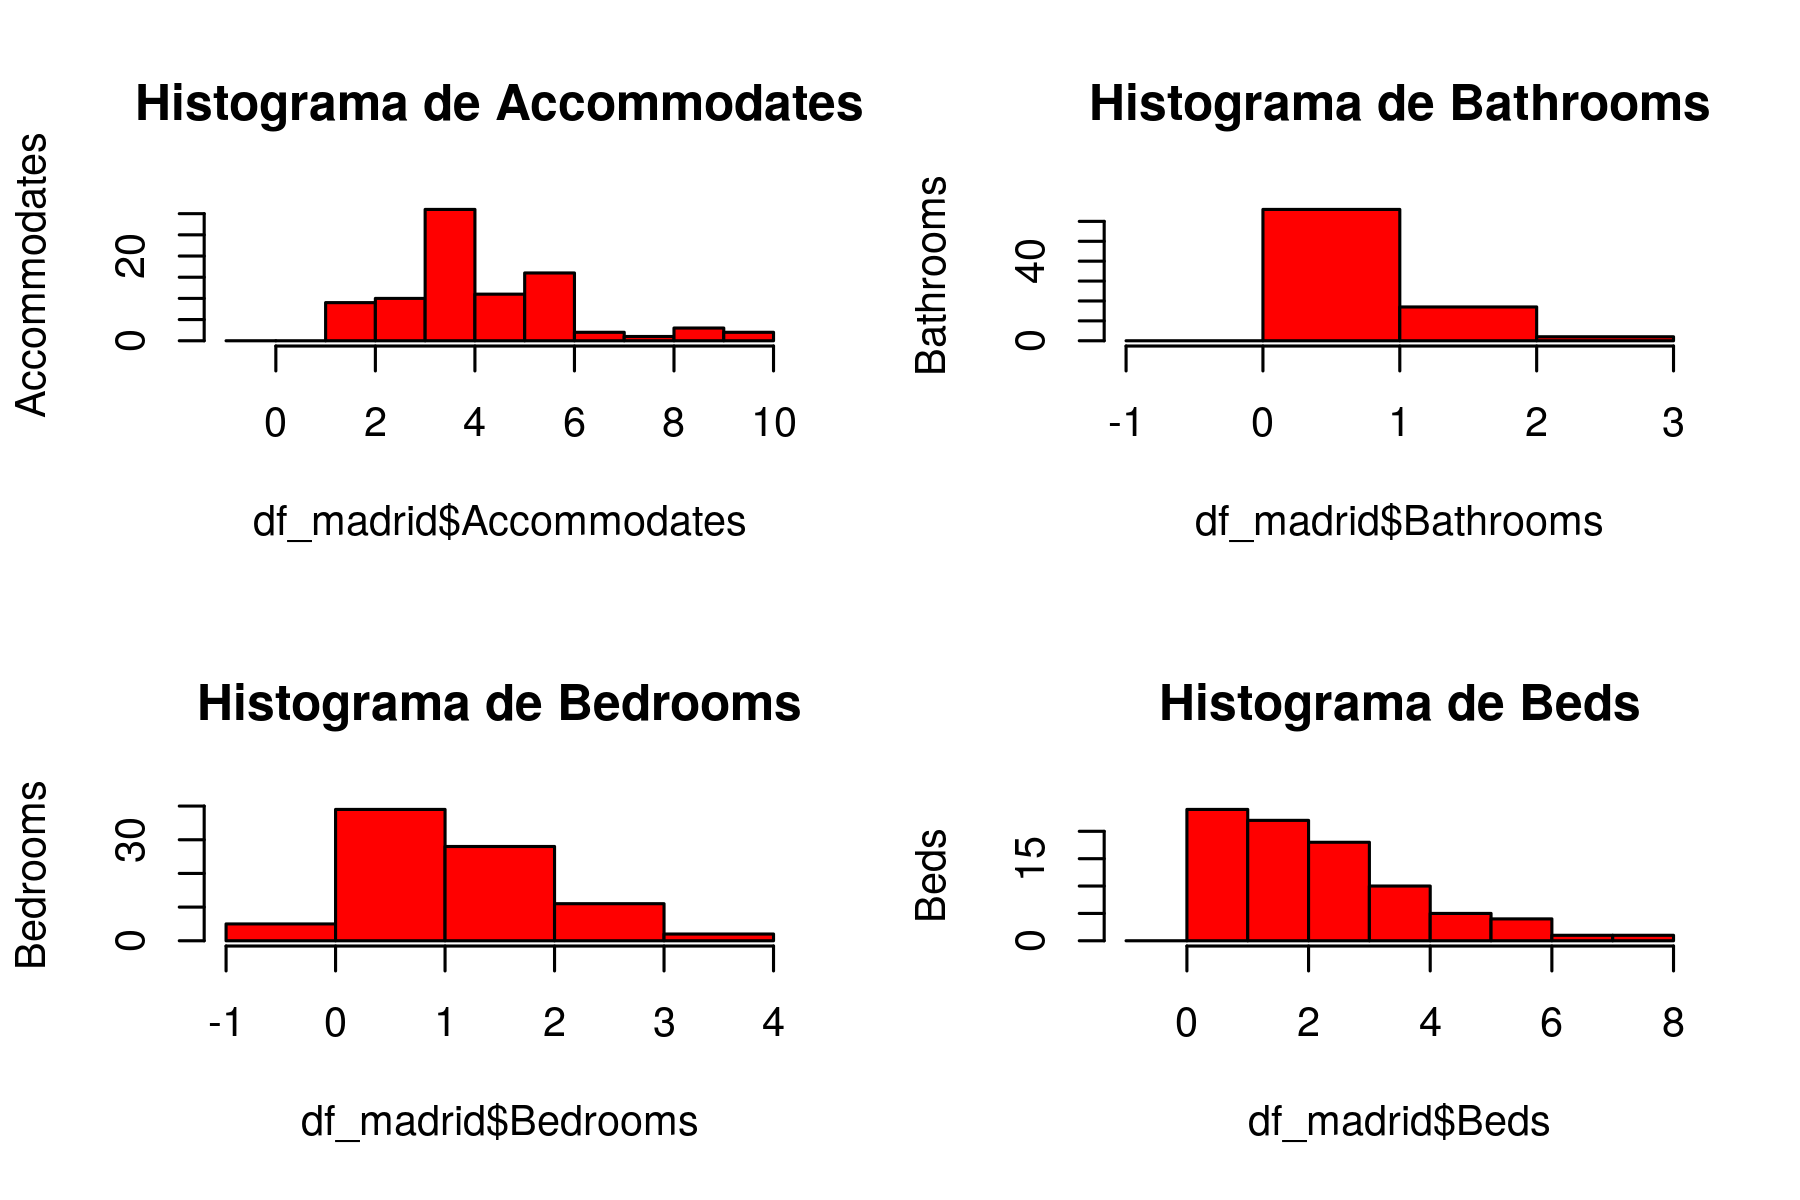

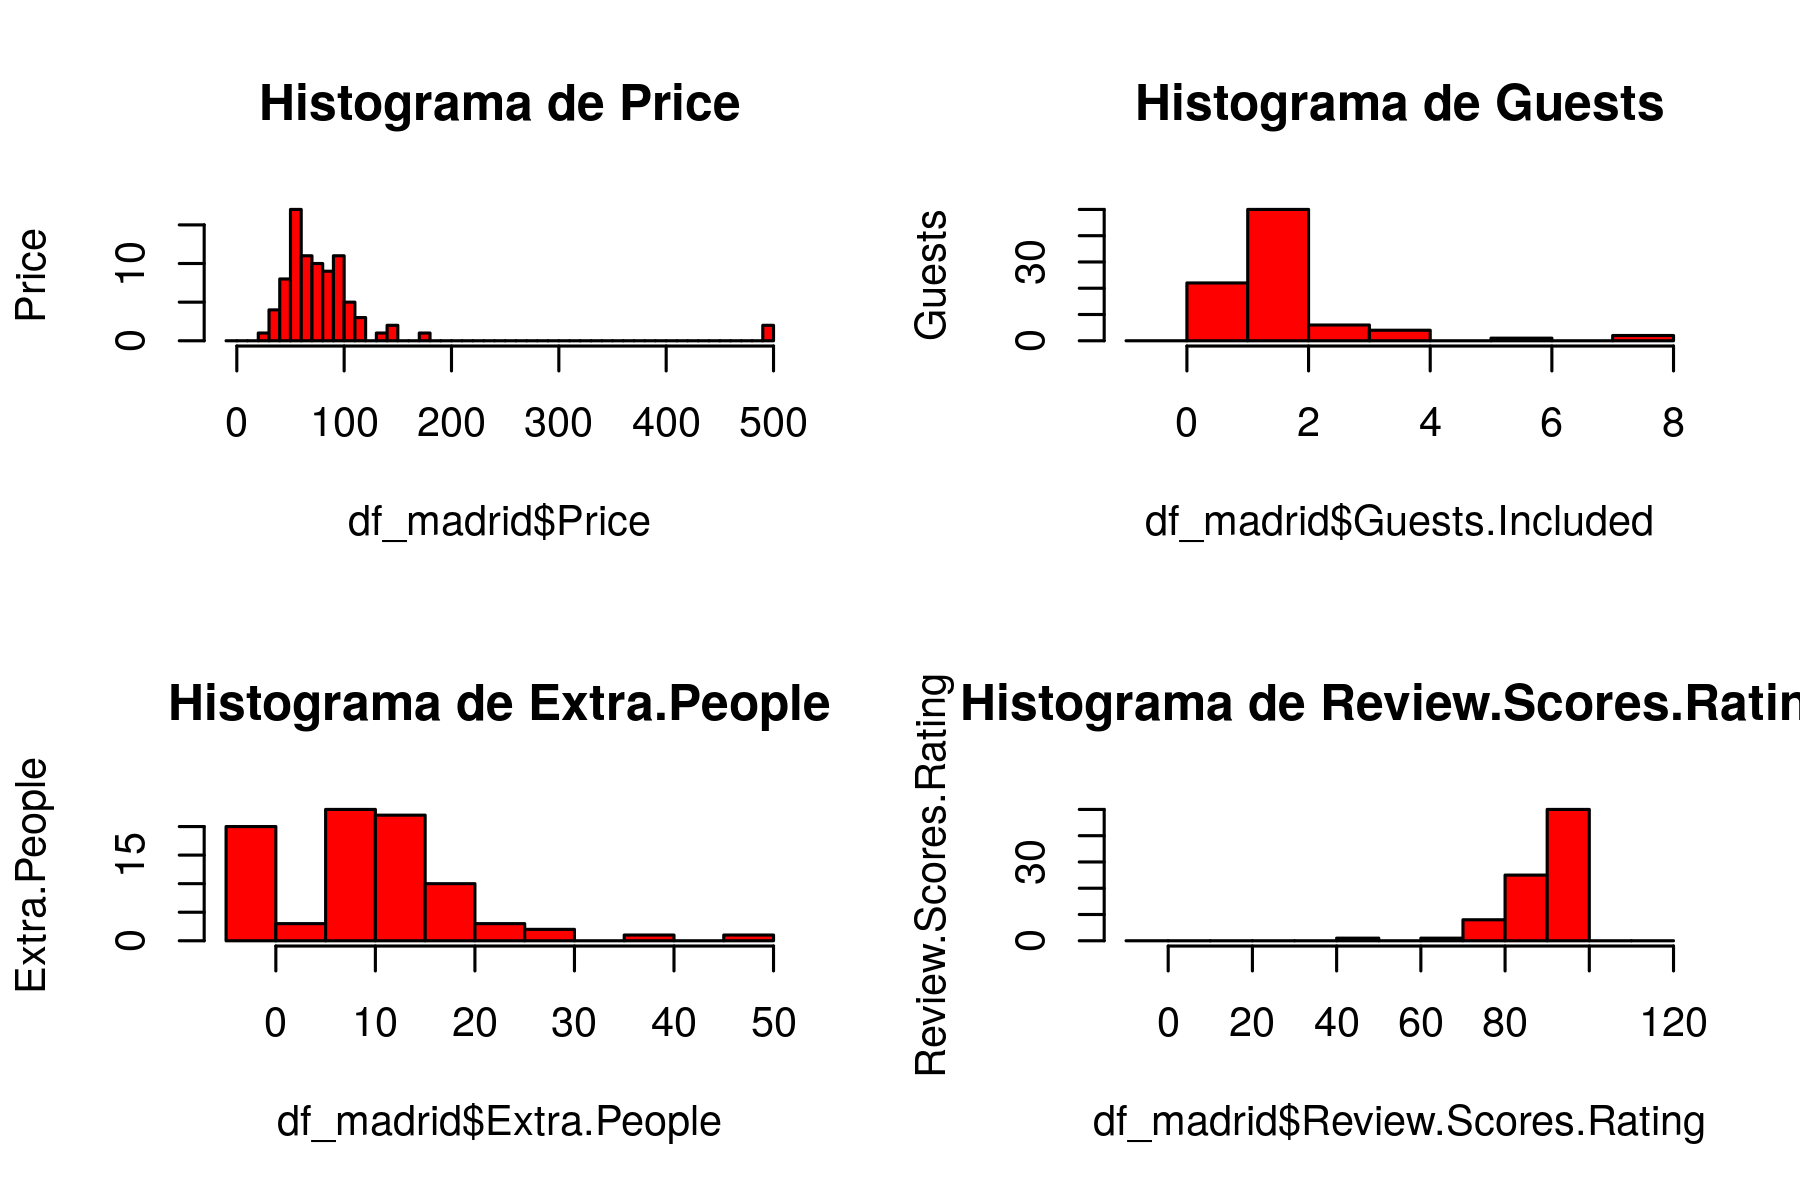

In [19]:

par(mfrow = c(2, 2))

hist(df_madrid$Accommodates, breaks = seq(-1, 10, 1), col = "red", main = "Histograma de Accommodates", ylab = "Accommodates")
hist(df_madrid$Bathrooms, breaks = seq(-1, 3, 1), col = "red", main = "Histograma de Bathrooms", ylab = "Bathrooms")
hist(df_madrid$Bedrooms, breaks = seq(-1, 4, 1), col = "red",  main = "Histograma de Bedrooms", ylab = "Bedrooms")
hist(df_madrid$Beds, breaks = seq(-1, 8, 1), col = "red",  main = "Histograma de Beds", ylab = "Beds")

par(mfrow = c(2, 2))
hist(df_madrid$Price, breaks = seq(-10, 500, 10), col = "red",  main = "Histograma de Price", ylab = "Price")
hist(df_madrid$Guests.Included, breaks = seq(-1, 8, 1), col = "red",  main = "Histograma de Guests", ylab = "Guests")
hist(df_madrid$Extra.People, breaks = seq(-5, 50, 5), col = "red",  main = "Histograma de Extra.People", ylab = "Extra.People")
hist(df_madrid$Review.Scores.Rating, breaks = seq(-10, 120, 10), col = "red",  main = "Histograma de Review.Scores.Rating", ylab = "Review.Scores.Rating")
par(mfrow = c(1, 1))

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [20]:
#Voy a repartir el df_madrid en training y testing:

set.seed(898996)    #Establezco una semilla
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7) 
M.train<-df_madrid[idx,]        #Me quedo con el 70% de los datos de df_madrid6 para training
M.test <-df_madrid[-idx,]       #y el 30% restante de los datos para testing


ModeloMadrid<-lm(Square.Meters~. , data=M.train) #calculo la regresion para todas las variables de df de trainning
summary(ModeloMadrid)


Call:
lm(formula = Square.Meters ~ ., data = M.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.552 -10.650  -0.870   9.436  47.857 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)           1.76283   42.31767   0.042  0.96694   
neighb_id            -0.73551    2.72186  -0.270  0.78812   
Accommodates          3.22822    3.08400   1.047  0.30035   
Bathrooms            19.93120    7.17348   2.778  0.00772 **
Bedrooms             15.94811    5.23332   3.047  0.00371 **
Beds                 -1.04830    3.25824  -0.322  0.74902   
Price                 0.09633    0.04548   2.118  0.03927 * 
Guests.Included      -6.55234    2.88589  -2.270  0.02761 * 
Extra.People         -0.30817    0.35301  -0.873  0.38693   
Review.Scores.Rating  0.13140    0.43388   0.303  0.76329   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.94 on 49 degrees of freedom
Multiple R-squared:  0.647,	Adjusted R-sq

**El valor Multiple R-squared = 0.6246 es mejorable, y también vemos que solo las variables Bathrooms, Bedrooms, Price y Guests.Included son representativas de Square.Meters.**

**Por tanto voy a quitar las no representativas del modelo**

In [21]:
ModeloMadrid<-lm(Square.Meters~Bathrooms+Bedrooms+Price+Guests.Included, data=M.train) #calculo la regresion para todas las variables de df de trainning
summary(ModeloMadrid)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price + Guests.Included, 
    data = M.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.987 -10.573  -1.339   9.787  46.952 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     15.82671    6.73339   2.350  0.02243 *  
Bathrooms       20.96075    6.76734   3.097  0.00310 ** 
Bedrooms        18.18918    3.21484   5.658 5.99e-07 ***
Price            0.09387    0.04030   2.329  0.02361 *  
Guests.Included -6.44916    2.31931  -2.781  0.00745 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.4 on 54 degrees of freedom
Multiple R-squared:  0.634,	Adjusted R-squared:  0.6069 
F-statistic: 23.39 on 4 and 54 DF,  p-value: 2.965e-11


**Ahora Multiple R-squared:  0.6434 ha bajado un poco más**


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

RMSE   Rsquared        MAE 
16.6474053  0.6340008 13.2010149

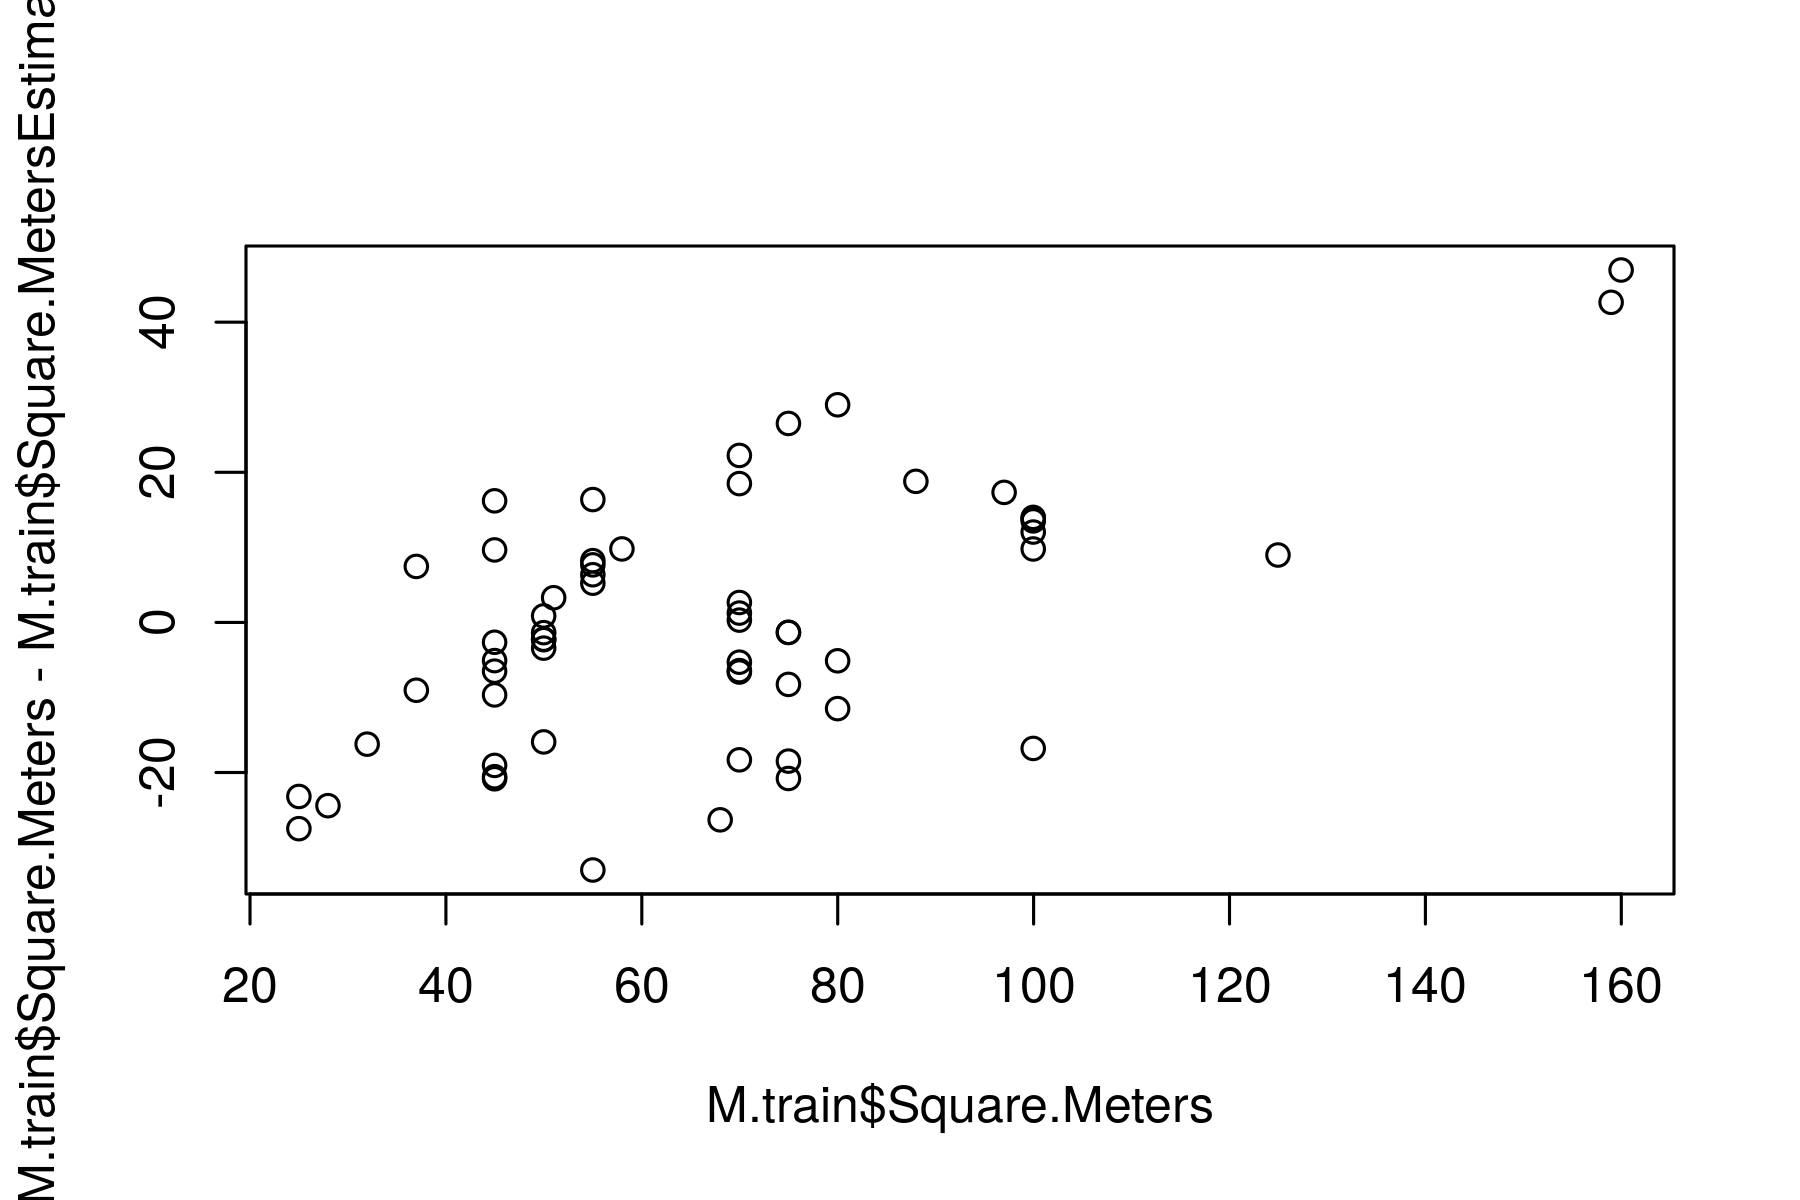

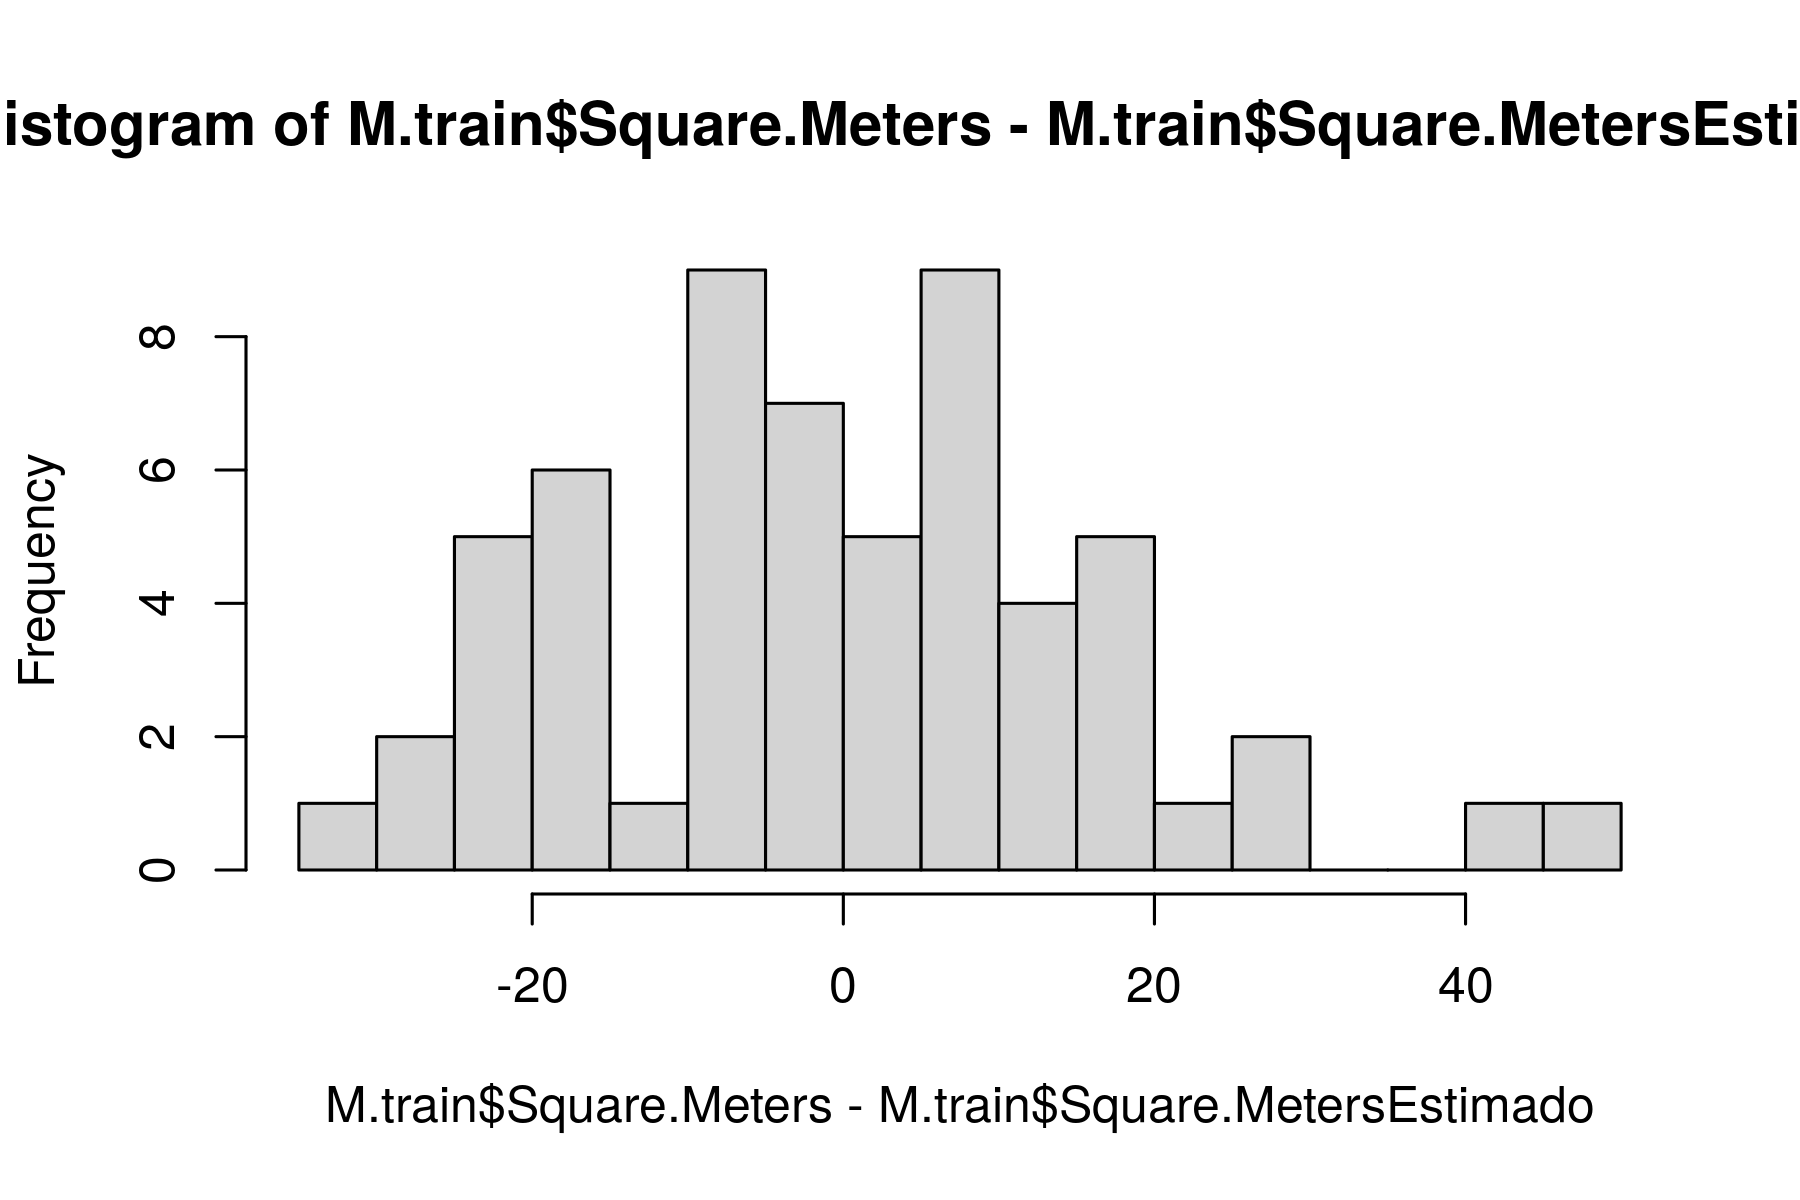

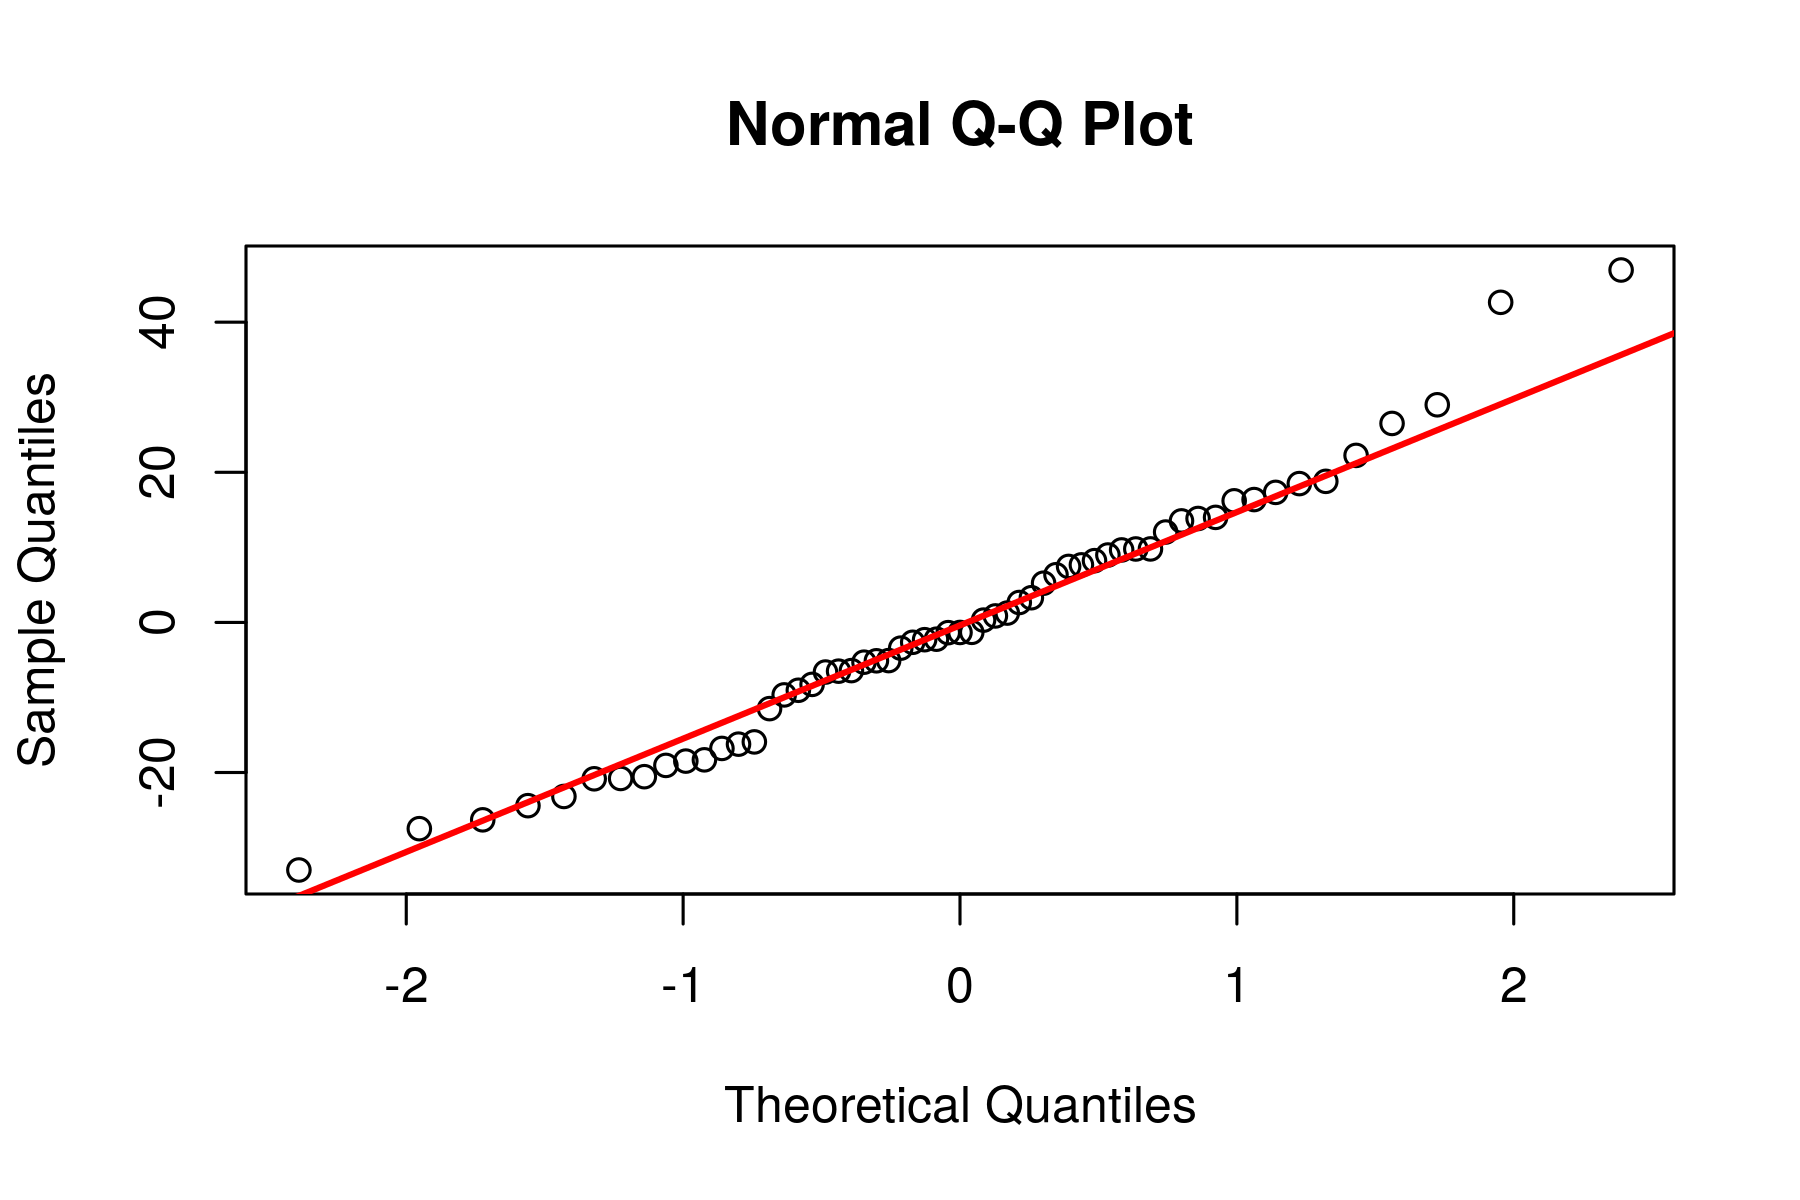

In [22]:
# A partir del modelo "ModeloMadrid" predigo resultados para el dataset "M.train"
M.train$Square.MetersEstimado <- predict(ModeloMadrid, M.train)

#Grafico los residuos:
plot(M.train$Square.Meters, (M.train$Square.Meters-M.train$Square.MetersEstimado))

#Caret:
caret::postResample(pred = M.train$Square.MetersEstimado, obs = M.train$Square.Meters) 

#Histograma:
hist(M.train$Square.Meters-M.train$Square.MetersEstimado,20) 

#QQPlot:
qqnorm(M.train$Square.Meters-M.train$Square.MetersEstimado)
qqline(M.train$Square.Meters-M.train$Square.MetersEstimado, col = 'red', lwd =2)


**Se ve que el gráfico de residuos muestra una nube que no se organiza en torno a una linea horizontal, que los residuos no siguen una distribución normal, y que el QQplot no se organzia perfectamente lineal, luego el modelo es mejorble**


**Voy a ver qué me dicen las distancias de Cooks:**

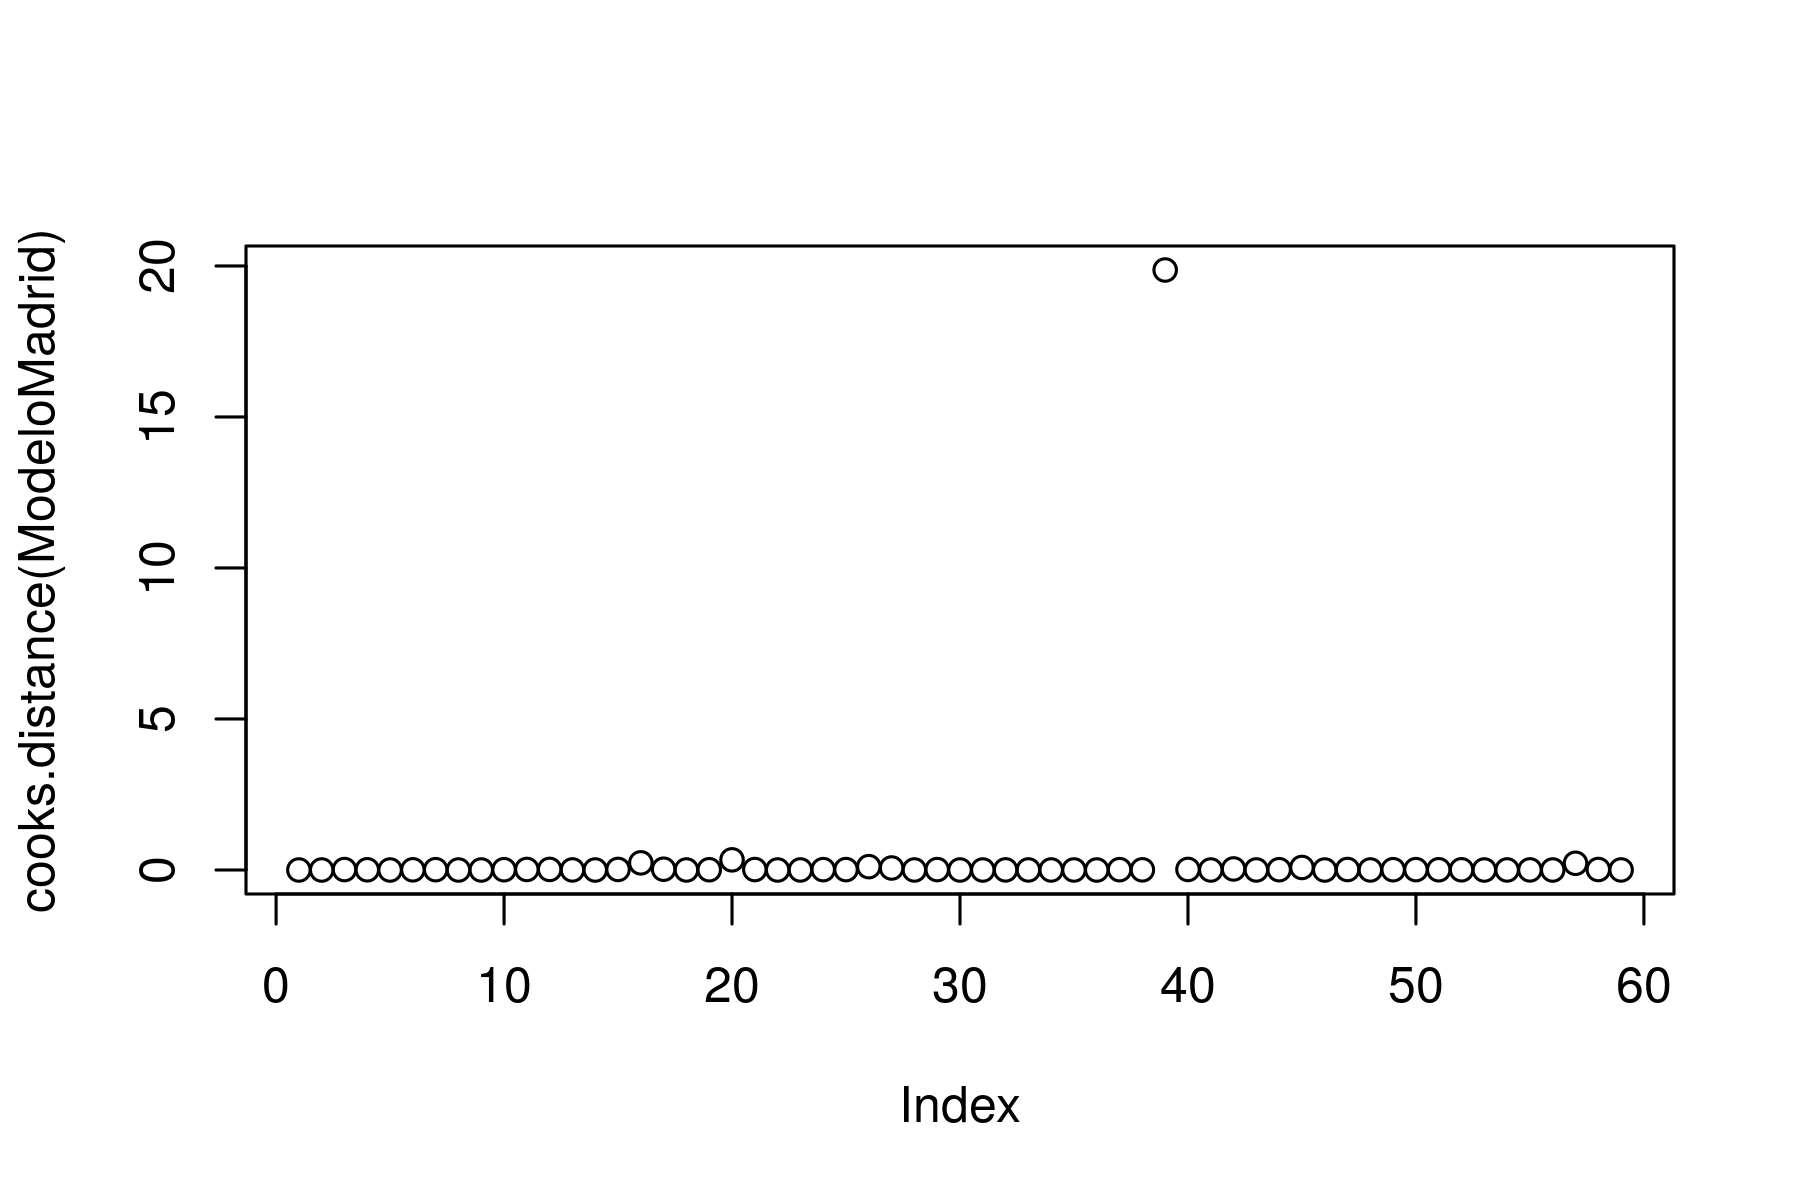

In [23]:
plot(cooks.distance(ModeloMadrid)) #Nos pinta para cada indice del modelo la distancia de Cooks


**Solo muestra un outlier por encima del una distancia de cook de 15.**

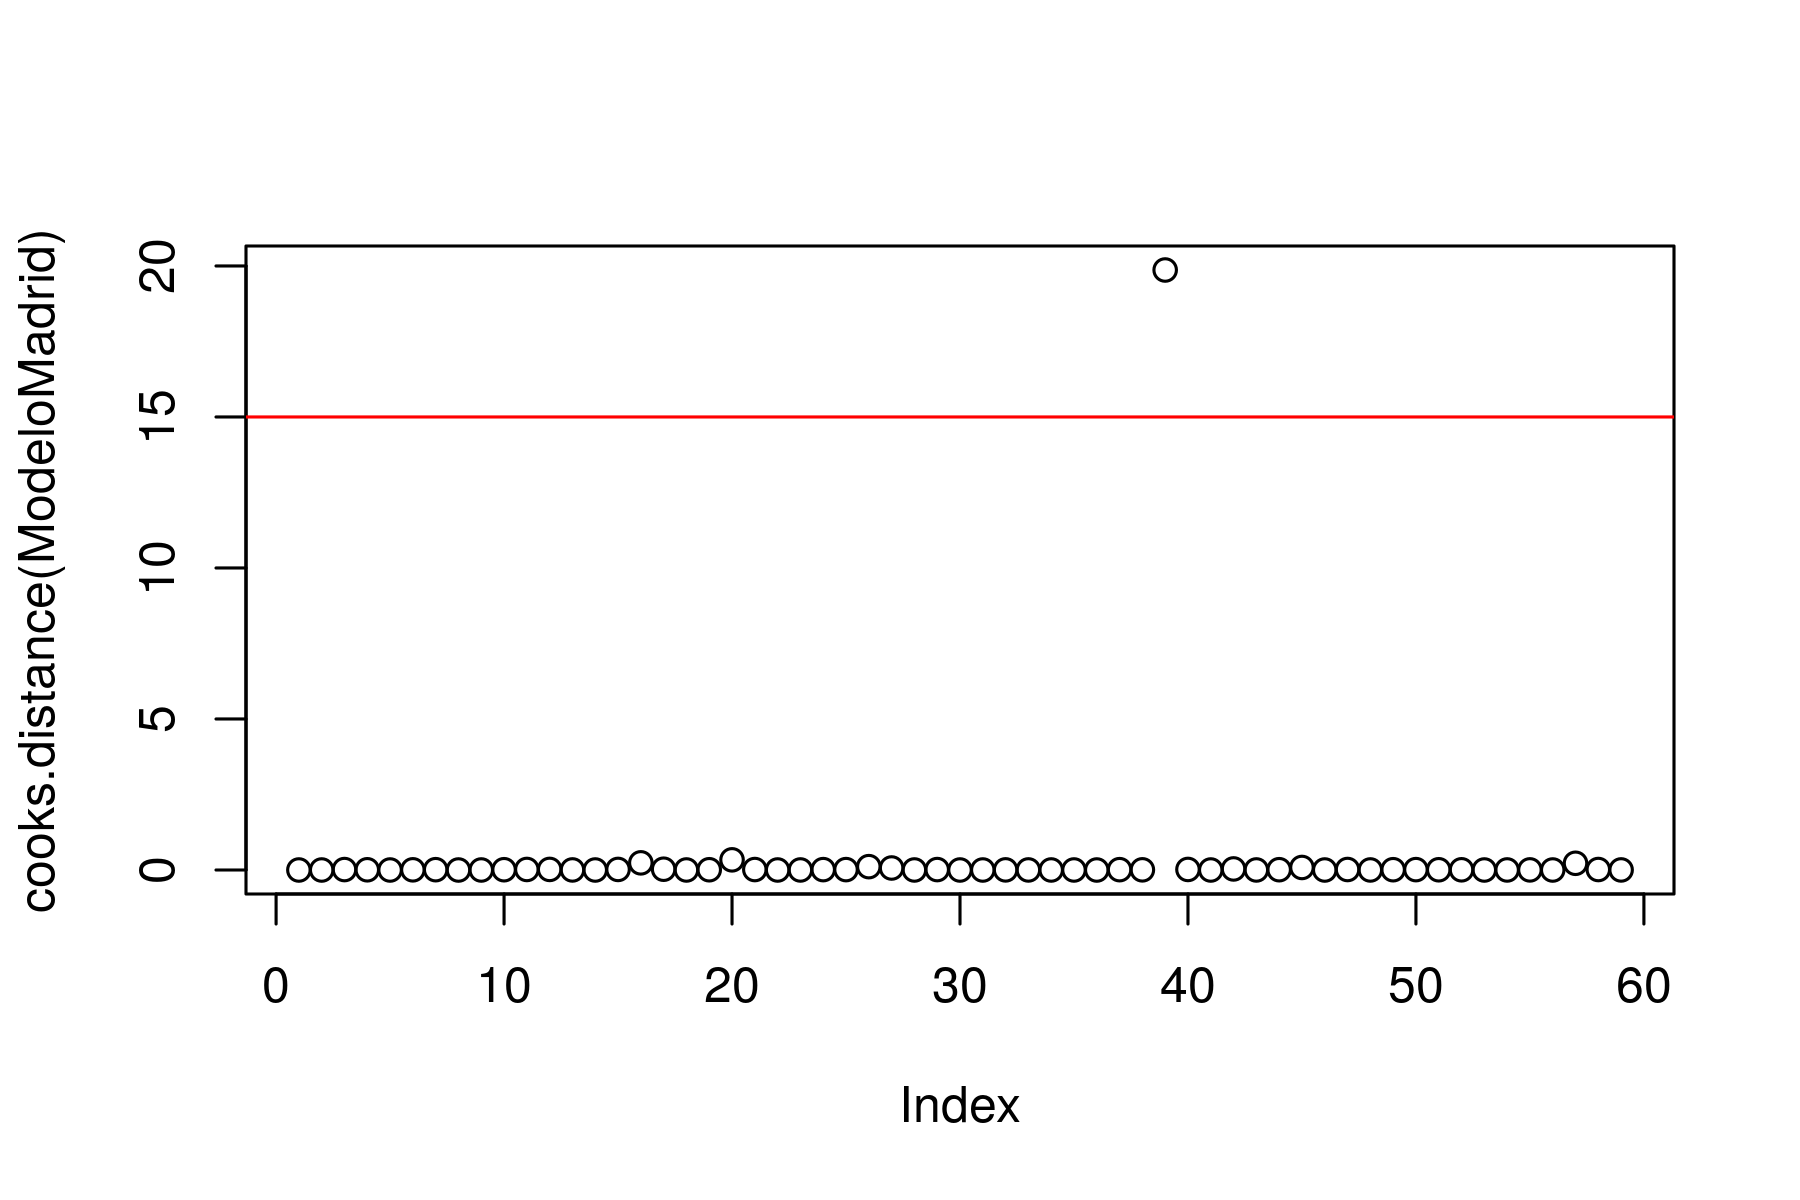

In [24]:
plot(cooks.distance(ModeloMadrid)) #Nos pinta para cada indice del modelo la distancia de Cooks
Outliers = 15                  #Fijo un umbral para identificar los outliers
abline(h=Outliers,col='red') 

In [25]:
#Elimino el outlier:
M.trainClean<-M.train[cooks.distance(ModeloMadrid)<Outliers, ] #Nos quedamos con los no-outliers
#Calculo el nuevo modelo sin outliers
ModeloMadridClean<-lm(Square.Meters~Bathrooms+Bedrooms+Price+Guests.Included, data=M.trainClean) #calculo la regresion para todas las variables de df de trainning
summary(ModeloMadridClean)



Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price + Guests.Included, 
    data = M.trainClean)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.751 -10.945   0.047  10.188  35.347 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.06852    6.03873   1.005  0.31950    
Bathrooms       10.20905    6.13887   1.663  0.10221    
Bedrooms        13.99135    2.85196   4.906 9.24e-06 ***
Price            0.46893    0.08557   5.480 1.20e-06 ***
Guests.Included -5.91100    1.96063  -3.015  0.00394 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.69 on 53 degrees of freedom
Multiple R-squared:  0.7441,	Adjusted R-squared:  0.7248 
F-statistic: 38.54 on 4 and 53 DF,  p-value: 4.253e-15


**Al calcular la nueva regresión veo Multiple R-squared:  0.7441 y que Bathrooms deja de ser representativo. Hago un nuevo modelo excluyendo Bathrooms pero viendo en qué cambia el nuevo R-cuadrado**


In [26]:
ModeloMadridClean<-lm(Square.Meters~Bedrooms+Price+Guests.Included, data=M.trainClean) #calculo la regresion para todas las variables de df de trainning
summary(ModeloMadridClean)


Call:
lm(formula = Square.Meters ~ Bedrooms + Price + Guests.Included, 
    data = M.trainClean)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.902 -13.080   1.024   9.695  38.546 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10.00778    5.64484   1.773   0.0819 .  
Bedrooms        15.31862    2.78241   5.506 1.04e-06 ***
Price            0.51131    0.08301   6.160 9.45e-08 ***
Guests.Included -4.33485    1.74417  -2.485   0.0161 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.92 on 54 degrees of freedom
Multiple R-squared:  0.7308,	Adjusted R-squared:  0.7158 
F-statistic: 48.86 on 3 and 54 DF,  p-value: 2.097e-15


**Ahora Multiple R-squared:  0.7308 que es algo menor que el anterior 0.7441. Por tanto mantengo la varible Bathrooms en el modelo y veré cómo se comporta con los datos de testing**


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price + Guests.Included, 
    data = M.trainClean)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.751 -10.945   0.047  10.188  35.347 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.06852    6.03873   1.005  0.31950    
Bathrooms       10.20905    6.13887   1.663  0.10221    
Bedrooms        13.99135    2.85196   4.906 9.24e-06 ***
Price            0.46893    0.08557   5.480 1.20e-06 ***
Guests.Included -5.91100    1.96063  -3.015  0.00394 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.69 on 53 degrees of freedom
Multiple R-squared:  0.7441,	Adjusted R-squared:  0.7248 
F-statistic: 38.54 on 4 and 53 DF,  p-value: 4.253e-15


RMSE   Rsquared        MAE 
41.0251224  0.1793367 20.9706807

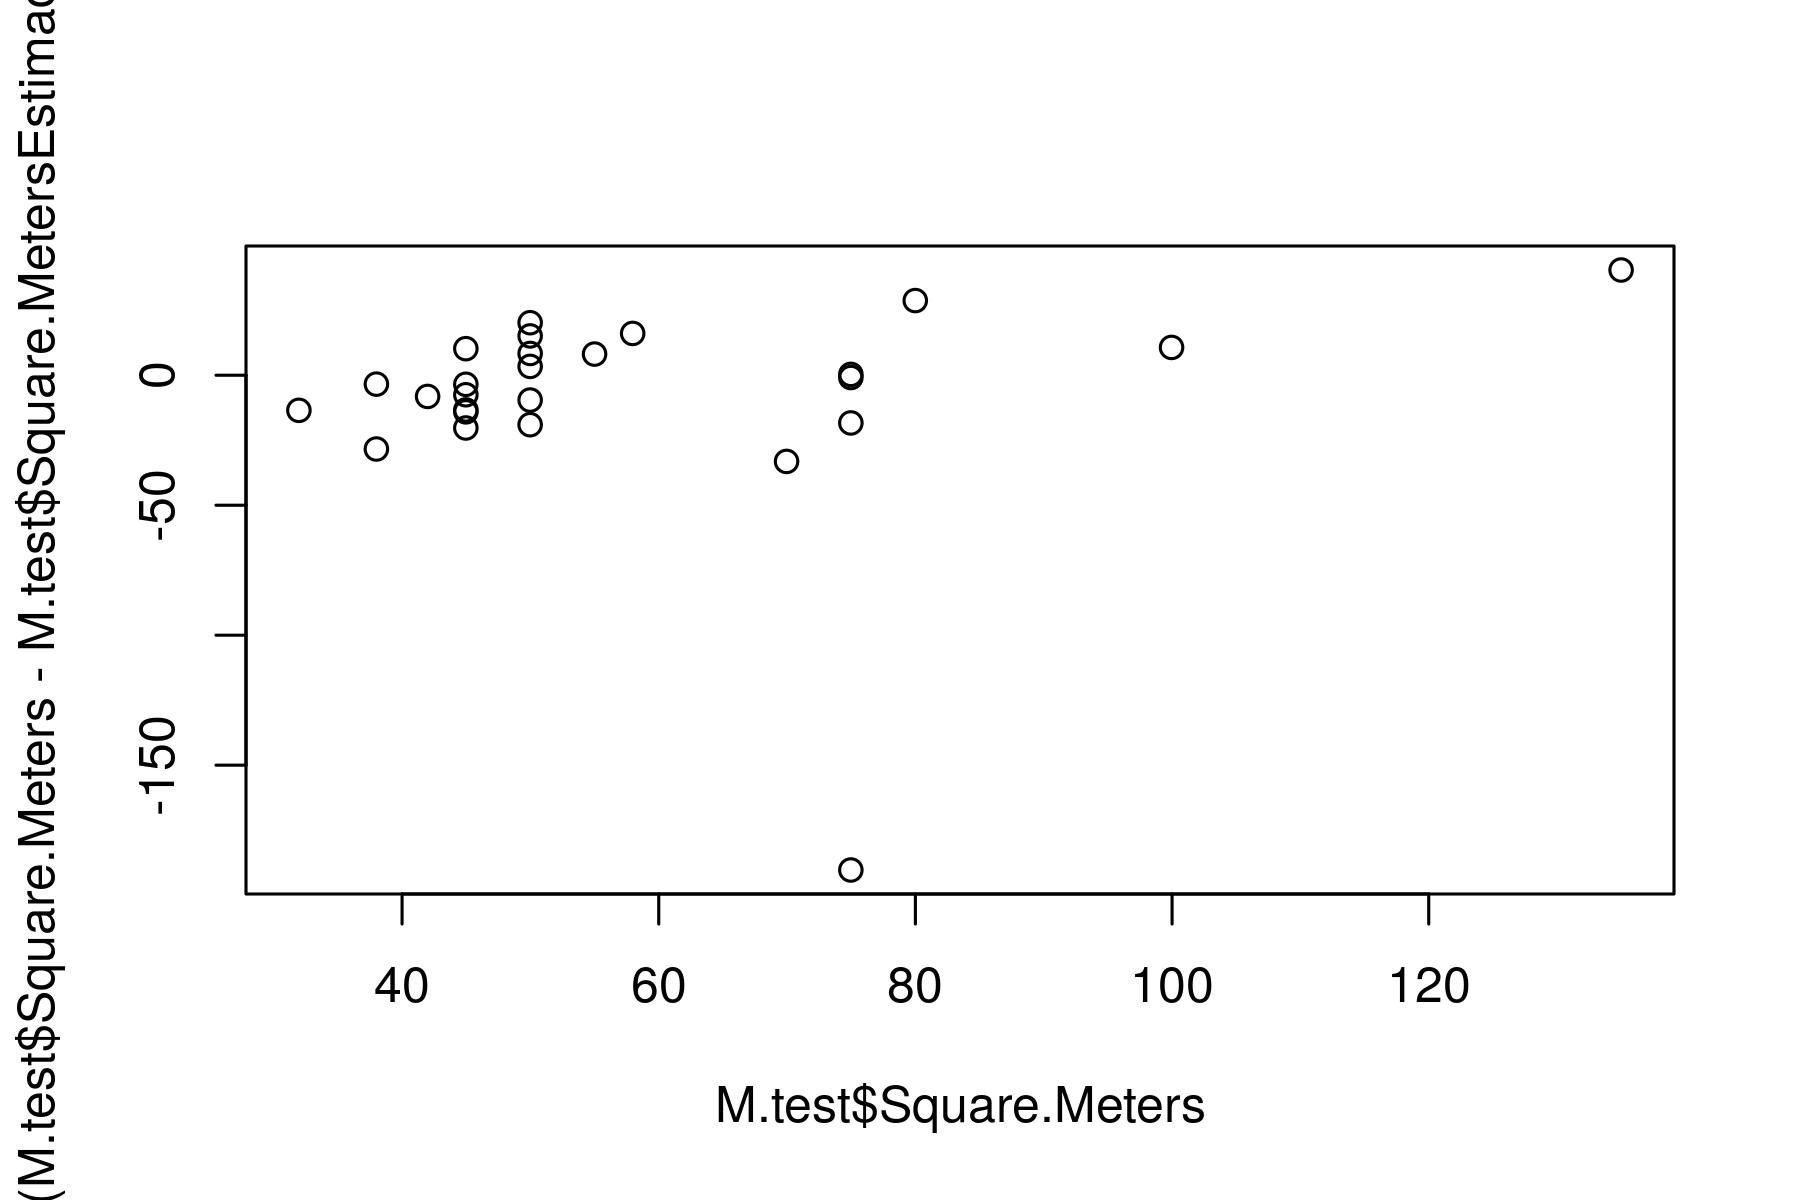

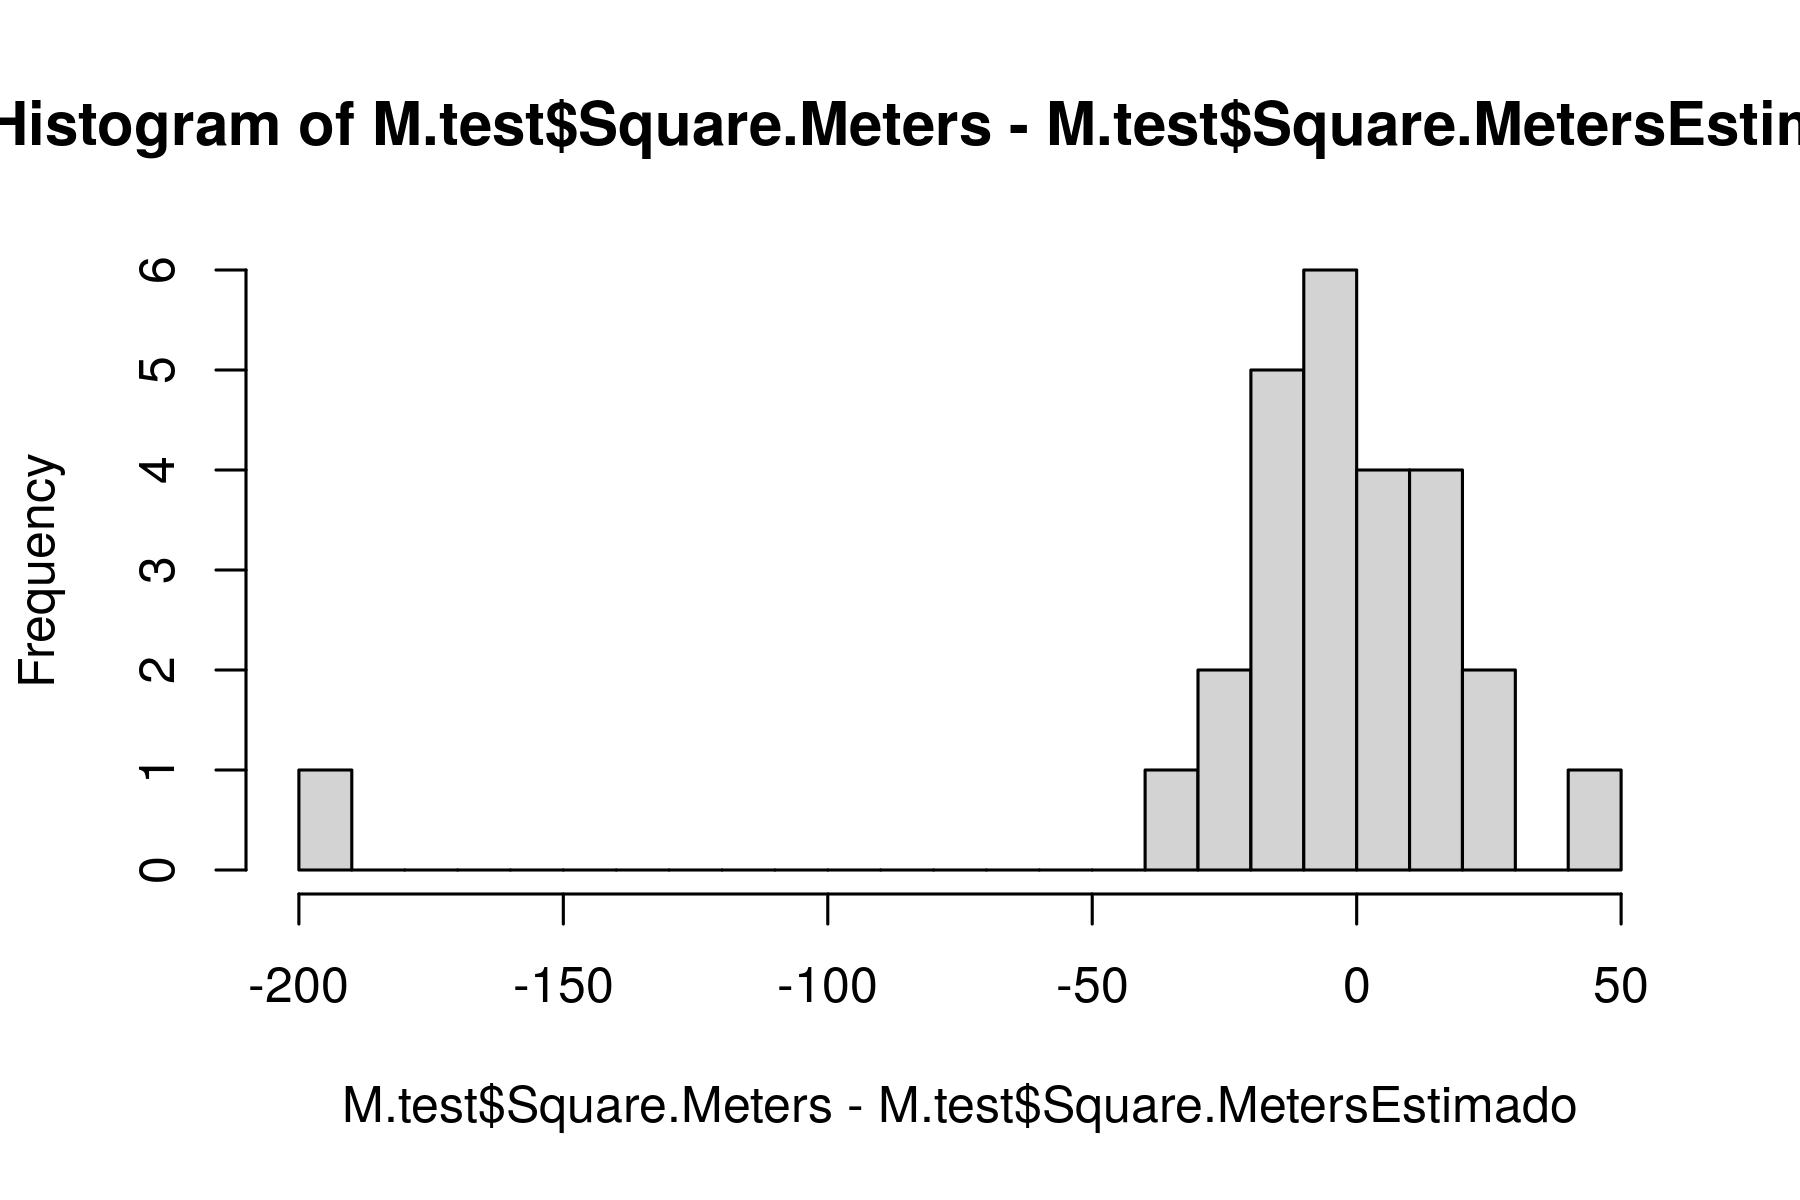

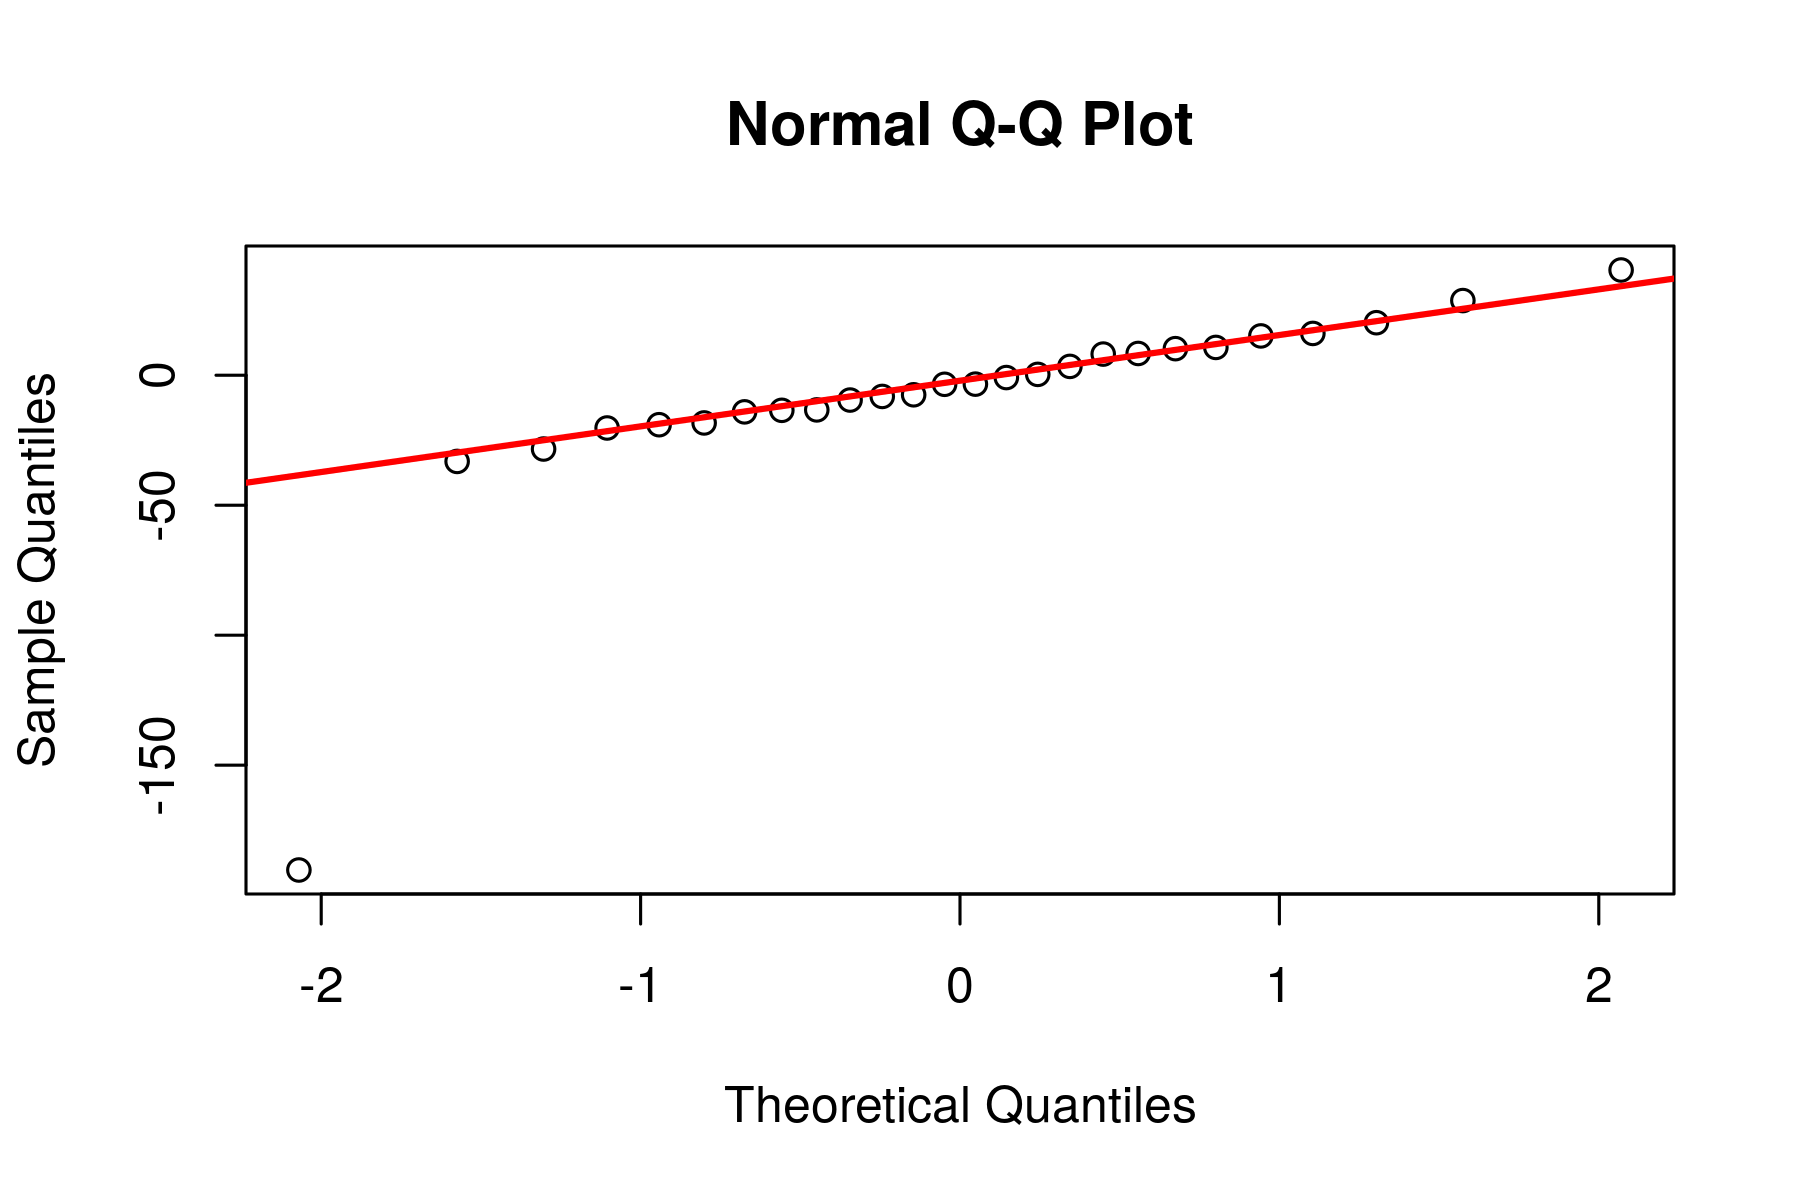

In [27]:
#Calculo de nuevo el nuevo modelo sin outliers e inlcuyendo Bathrooms
ModeloMadridClean<-lm(Square.Meters~Bathrooms+Bedrooms+Price+Guests.Included, data=M.trainClean) #calculo la regresion para todas las variables de df de trainning
summary(ModeloMadridClean)

# A partir del modelo "ModeloMadridClean" predigo resultados para el dataset "M.test"
M.test$Square.MetersEstimado <- predict(ModeloMadridClean, M.test)

#Grafico los residuos:
plot(M.test$Square.Meters, (M.test$Square.Meters-M.test$Square.MetersEstimado))

#Caret:
caret::postResample(pred = M.test$Square.MetersEstimado, obs = M.test$Square.Meters) 

#Histograma:
hist(M.test$Square.Meters-M.test$Square.MetersEstimado,20) 

#QQPlot:
qqnorm(M.test$Square.Meters-M.test$Square.MetersEstimado)
qqline(M.test$Square.Meters-M.test$Square.MetersEstimado, col = 'red', lwd =2)

**Parece que con los datos de testing el gráfico de residuos y el QQPlot tienen un buen aspecto, lo dejo así**

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

**El modelo que he identificado solo considera las variables Bathrooms, Bedrooms, Price, Guests.Included. Por tanto: Bathrooms =1, Bedrooms=3, Price=80 y veo que posibles valores toma Guests.Included en los datos**


In [28]:
#Veo todos los posibles valores que tengo en la variable Guests.Included 
Guests.IncludeValores <- c(unique(M.trainClean$Guests.Included))
print("Los distintos valores de Guests.Included son:")
Guests.IncludeValores

[1] "Los distintos valores de Guests.Included son:"


[1] 1 2 3 8 4

In [29]:
ModeloMadridClean


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price + Guests.Included, 
    data = M.trainClean)

Coefficients:
    (Intercept)        Bathrooms         Bedrooms            Price  
         6.0685          10.2090          13.9914           0.4689  
Guests.Included  
        -5.9110  


**Creo Nuevo_df con los valores que me da el caso que se plantea**

In [30]:
#Monto un bucle para calcular la prediccion todos los posibles valores de Guests.Included y función predict

for (i in Guests.IncludeValores) {
    Nuevo_df <- data.frame(Bathrooms=1, Bedrooms=4, Price=80, Guests.Included=i)
    Prediccion <- predict(object=ModeloMadridClean, newdata=Nuevo_df)
    print(paste("Para propiedades con Bedrooms=3, Price=80, Guests.Included=", i, "la superficie estimada es de:", Prediccion))
}



[1] "Para propiedades con Bedrooms=3, Price=80, Guests.Included= 1 la superficie estimada es de: 103.846016305568"
[1] "Para propiedades con Bedrooms=3, Price=80, Guests.Included= 2 la superficie estimada es de: 97.9350113231521"
[1] "Para propiedades con Bedrooms=3, Price=80, Guests.Included= 3 la superficie estimada es de: 92.0240063407361"
[1] "Para propiedades con Bedrooms=3, Price=80, Guests.Included= 8 la superficie estimada es de: 62.4689814286559"
[1] "Para propiedades con Bedrooms=3, Price=80, Guests.Included= 4 la superficie estimada es de: 86.11300135832"


In [31]:
#OTRA FORMA DE HACER LA PREDICCION: pero de uno en uno
mi_estimacion <- function (Bat, Bed, Pr, GI) {
    Nuevo_df <- data.frame(Bathrooms=Bat, Bedrooms=Bed, Price=Pr, Guests.Included=GI)
    Prediccion <- predict(object=ModeloMadridClean, newdata=Nuevo_df)
    return(Prediccion)
}
    
mi_estimacion(1,1,112,2)


1 
70.96657

**En mi modelo el coeficiente de la varible Bedrooms vale 13.9914. Por lo tanto, a igualdad del resto de variables, por cada habitación adicional la superficie estimada aumenta en 13.9914 metros cuadrados. (Y por cada habitación de menos, disminuye en ese mismo valor, claro)**

**Lo compruebo usando la segunda de las formas de calculo, justo arriba:**

In [32]:
mi_estimacion <- function (Bat, Bed, Pr, GI) {
    Nuevo_df <- data.frame(Bathrooms=Bat, Bedrooms=Bed, Price=Pr, Guests.Included=GI)
    Prediccion <- predict(object=ModeloMadridClean, newdata=Nuevo_df)
    return(Prediccion)
}

for (i in 1:5) print(paste("Para", i ,"habitaciones, 1 baño, 112 metros y 2 Guests.Included, la predicción es :", mi_estimacion(1,i,112,2)))


[1] "Para 1 habitaciones, 1 baño, 112 metros y 2 Guests.Included, la predicción es : 70.966567198573"
[1] "Para 2 habitaciones, 1 baño, 112 metros y 2 Guests.Included, la predicción es : 84.9579208092669"
[1] "Para 3 habitaciones, 1 baño, 112 metros y 2 Guests.Included, la predicción es : 98.9492744199608"
[1] "Para 4 habitaciones, 1 baño, 112 metros y 2 Guests.Included, la predicción es : 112.940628030655"
[1] "Para 5 habitaciones, 1 baño, 112 metros y 2 Guests.Included, la predicción es : 126.931981641349"


Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [166]:
df_madridFinal <- df_madridFinal %>%
                        mutate (df_madridFinal, temporal = mi_estimacion(df_madridFinal["Bathrooms"],df_madridFinal["Bedrooms"],df_madridFinal["Price"],df_madridFinal["Guests.Included"])) %>% 
                        select (-Square.Meters) %>% 
                        rename (Square.Meters = temporal)

head(df_madridFinal, n=4) #Mera comprobacion

#si quedan NAs en otras columnas 

ERROR: Error in mutate(., df_madridFinal, temporal = mi_estimacion(df_madridFinal["Bathrooms"], : object 'df_madridFinal' not found


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [167]:
# retomo el df original
head(df_ParaPCA, n=1)  

# elimino todas las filas con un valor faltante en las primeras 11 columnas (todas excepto Square.Meters)
df_ParaPCA <- df_ParaPCA [complete.cases (df_ParaPCA [, c (1:11)]),]

# reordeno columnas para tenerlas en el mismo orden que el enunciado:
df_ParaPCA <- df_ParaPCA[c(2,3,4,5,6,7,8,9,10,11,12)]
                          
#Relleno los Square.Meters = NA con la prediccion.
df_ParaPCA <- df_ParaPCA %>%
                        mutate (df_ParaPCA, temporal = mi_estimacion(df_ParaPCA["Bathrooms"],df_ParaPCA["Bedrooms"],df_ParaPCA["Price"],df_ParaPCA["Guests.Included"])) %>% 
                        select (-Square.Meters) %>% 
                        rename (Square.Meters = temporal)

head(df_ParaPCA, n=4) #Mera comprobacion


Prediccion <- predict(object=ModeloMadridClean, newdata=Nuevo_df)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,NA


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,2,1,1,1,85,1,0,95,40.41697,-3.709439,64.21658
7,4,1,1,2,112,2,5,99,40.42319,-3.711249,70.96657
8,8,3,3,4,190,6,40,96,40.41651,-3.717843,132.29954
12,2,1,1,1,71,1,0,90,40.41200,-3.706691,57.65163


In [168]:
#Compruebo de nuevo que los datos del df que voy a usar no contienen NAs
any(is.na(df_ParaPCA))

[1] FALSE

In [169]:
#Una vez  confirmado, estandarizo las variables para que tengan media cero y desviación estandar igual a 1
pr<-prcomp(df_ParaPCA,center = TRUE, scale. = TRUE)
pr

Standard deviations (1, .., p=11):
 [1] 2.186581e+00 1.142237e+00 1.070608e+00 1.015235e+00 8.824549e-01
 [6] 8.291933e-01 6.983821e-01 6.014946e-01 5.245356e-01 3.824841e-01
[11] 3.172297e-16

Rotation (n x k) = (11 x 11):
                            PC1         PC2         PC3          PC4        PC5
Accommodates         0.39993909  0.11736721  0.10023907 -0.158873838 -0.1877053
Bathrooms            0.36552255 -0.12330036 -0.15577478  0.066476803  0.1109457
Bedrooms             0.39613218 -0.02087069 -0.03810366 -0.083707738 -0.1554618
Beds                 0.38585912  0.05443701  0.06026147 -0.139823803 -0.2489596
Price                0.37330070 -0.10961058 -0.23239767  0.120281474  0.2875179
Guests.Included      0.27857833  0.27351852  0.43638976 -0.039116166 -0.1334391
Extra.People         0.12799359  0.32812800  0.61545561  0.191079702  0.4327967
Review.Scores.Rating 0.03760624  0.10516385 -0.08585110  0.928620673 -0.1489597
Latitude             0.02293300 -0.62838681  0.31773189 

El número de componentes principales que puedo obtener de los datos es el número de columanas de mis datos, por tanto como mucho 11.

In [173]:
N_pcas<-3 #tomo 3 componentes prncipales

#Tomo los primeros N_pcas de la matriz de valores transformados:
Apc <- pr$x[ , 1:N_pcas]

#Me invento un piso:
piso_prueba <- data.frame(Accommodates = 1, Bathrooms = 1, Bedrooms = 1, Beds = 1, 
                       Price = 70, Guests.Included = 1, Extra.People = 0, Review.Scores.Rating = 80, 
                       Latitude = 40.48888, Longitude = -3.694525, Square.Meters = 40)


piso_prueba_tr <- predict(object=pr, orig_pic)

dist<-rep(NA,nrow(Apc))

for (i in 1:nrow(Apc)){
    dist[i]<-sum((piso_prueba-Apc[i,])^2)
}

head(order(dist),5)


print("Los cinco pisos 'más próximos' al piso dado son:")
df_ParaPCA[head(order(dist),5) , ]


[1]  503 1057  173  664 1415

[1] "Los cinco pisos 'más próximos' al piso dado son:"


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1379,2,1.0,1,1,75,2,274,94,40.42241,-3.702625,53.61632
3026,2,1.5,1,1,55,2,276,96,40.43089,-3.700778,49.34234
453,5,1.0,1,3,500,1,250,83,40.40885,-3.694527,258.82067
1991,2,1.0,1,1,50,15,15,100,40.41163,-3.694433,-34.94988
4021,6,1.0,3,3,55,5,20,89,40.39113,-3.754068,54.48750


####  Para comprobar si funciona utilizo ahora uno de lso anteriores por ejemplo eñ ultimo el 4021

In [183]:
N_pcas<-3 #tomo 3 componentes principales

#Tomo los primeros N_pcas de la matriz de valores transformados:
Apc <- pr$x[ , 1:N_pcas]

#Uso el piso 4021:
piso_prueba <- data.frame(Accommodates = 6, Bathrooms = 1, Bedrooms = 3, Beds = 3,
                          Price = 556, Guests.Included = 5, Extra.People = 20, Review.Scores.Rating = 89,
                          Latitude = 40.39113, Longitude = -3.39113, Square.Meters = 54)


piso_prueba_tr <- predict(object=pr, orig_pic)

dist<-rep(NA,nrow(Apc))

for (i in 1:nrow(Apc)){
    dist[i]<-sum((piso_prueba-Apc[i,])^2)
}

head(order(dist),5)

df_ParaPCA[head(order(dist),5) , ]

[1]  503 1057  173 1678 1415

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1379,2,1.0,1,1,75,2,274,94,40.42241,-3.702625,53.61632
3026,2,1.5,1,1,55,2,276,96,40.43089,-3.700778,49.34234
453,5,1.0,1,3,500,1,250,83,40.40885,-3.694527,258.82067
4951,5,2.0,2,2,60,5,0,98,40.36160,-3.758044,53.04983
4021,6,1.0,3,3,55,5,20,89,40.39113,-3.754068,54.48750


### Bueno, lo localiza, pero dice que es el quinto más cercano .... 

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?